In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from openpyxl.utils.dataframe import dataframe_to_rows
import os
#import xlwt
from openpyxl import load_workbook
import time
import scipy
import math
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.signal import savgol_filter #Smooth
import ast


In [2]:
cm =1/2.54
def fig_pre_def(fx=8, fy=6,lw=1,dpi = 200):
    cm =1/2.54
    plt.rcParams['figure.dpi'] = dpi
    plt.rc('font', family='Helvetica')         # 自型
    plt.rcParams['axes.linewidth'] = lw     # 設置外框的寬度
    return  plt.figure(figsize=(fx*cm,fy*cm))   
    ax = fig.add_subplot(1, 1, 1)
def fig_post_def(xticks =(None,None),yticks =(None,None), 
                 xlim=(None,None),ylim=(None,None),
                 xlabel = None,ylabel=None,
                 title=None,
                 lg_fs = 6,lb_fs = 8, n_col =1,
                 unit = 1/2.54, SVG = False,onefig=True):
    if xticks[0] != None:
        # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xticks[0]))    
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xticks[1]))    
    if yticks[0] != None:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yticks[0]))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(yticks[1]))
    #plt.rc('xtick', labelsize=fontsize)          # X軸數字的文字大小
    #plt.rc('ytick', labelsize=fontsize)          # Y軸數字的文字大小
    ax.tick_params(axis='x', labelsize= lb_fs)
    ax.tick_params(axis='y', labelsize= lb_fs)
    ax.xaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', right='on')   # y軸次要格線
    new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
    plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
    mpl.rcParams.update(new_rc_params)
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if xlabel != None:
        ax.set_xlabel(xlabel,fontsize=lb_fs)
    if ylabel != None:
        ax.set_ylabel(ylabel,fontsize=lb_fs)

    if SVG == True:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])

        new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
        plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
        mpl.rcParams.update(new_rc_params)
    if onefig ==True:
        plt.gca().set_position([0, 0, 1, 1])


    plt.legend(fontsize=lg_fs,title=title,title_fontsize=lg_fs,frameon= False,ncol=n_col)
    plt.rcParams['figure.dpi'] = 80
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#plt.scatter(x,y, alpha=0.6,linewidth=0,s=30*cm,label=' ')
#plt.plot(x,y     ,'--ob',markersize=8*cm,linewidth=3*cm,mew=0,label='point source')
#fig_post_def()
def sorting(input_data, bin_number , lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    
    return Bin_center, hist

In [3]:
def sorting(input_data, bin_number , lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    return Bin_center, hist

In [4]:
def bar_plot(input_x,input_y,binning):
    xs = [input_x[0] - binning/2]
    ys = [0]
    for i in range(len(input_x)):
        xs.append(input_x[i] - binning/2)
        xs.append(input_x[i] + binning/2)
        ys.append(input_y[i])
        ys.append(input_y[i])
    xs.append(input_x[-1] + binning/2)
    ys.append(0)
    return np.array(xs),np.array(ys)

In [5]:

data_10MeV=[]
for i in np.arange(0,32,1):
    if i ==0:
        data_10MeV = np.loadtxt("../../../../data/NSTOF_simulation_mono_Energy/202404_NSTOF_simulation_mono_Energy/202402_EJ309_N_scatter_exp_60deg_2E9_All_in_one_1.0MeV_"+str(int(i))+".txt")
    else:
        data_10MeV_temp = np.loadtxt("../../../../data/NSTOF_simulation_mono_Energy/202404_NSTOF_simulation_mono_Energy/202402_EJ309_N_scatter_exp_60deg_2E9_All_in_one_1.0MeV_"+str(int(i))+".txt")
        data_10MeV = np.vstack((data_10MeV,data_10MeV_temp))
        
        #print(data_6MeV.shape)

In [46]:
for i in np.arange(1.5,12.5,0.5):
    print(i)
    for ii in np.arange(0,32,1):
        if ii ==0:
            globals()["data_"+str(int(i*10))+"MeV"]= pd.read_csv("../../../../data/NSTOF_simulation_mono_Energy/202404_NSTOF_simulation_mono_Energy//202402_EJ309_N_scatter_exp_60deg_2E9_All_in_one_"+str(i)+"MeV_"+str(int(ii))+".txt", sep="\s+", header=None)
        else:
            temp = pd.read_csv("../../../../data/NSTOF_simulation_mono_Energy/202404_NSTOF_simulation_mono_Energy/202402_EJ309_N_scatter_exp_60deg_2E9_All_in_one_"+str(i)+"MeV_"+str(int(ii))+".txt", sep="\s+", header=None)
            globals()["data_"+str(int(i*10))+"MeV"] = np.vstack((globals()["data_"+str(int(i*10))+"MeV"],temp))
        

1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5
10.0
10.5
11.0
11.5
12.0


In [47]:
for i in np.arange(10,125,5):
    globals()["data_"+str(int(i))+"MeV"] = pd.DataFrame(globals()["data_"+str(int(i))+"MeV"],columns=["core","counts","Tri_LO","Tri_pE","Rec_nE","Rec_LO","Tri_p_num"])


In [48]:
def Light_output_exponential_method(E):
    A=0.62  #0.817
    B=1.3   #2.63
    C=0.39  #0.297
    D=0.97  #1
    LO =A*E-B*(1-np.exp(-1*C*E**D))
    return LO
def interpolation_function(data_x,data_y,new_x):
    new_y = interp1d(data_x, data_y,fill_value="extrapolate")(new_x)
    return new_y

In [49]:
enegy_range= np.arange(0,13,0.0001)
lightoutput_2inches= Light_output_exponential_method(enegy_range)
print(lightoutput_2inches)

[ 0.00000000e+00 -4.83389860e-06 -6.91372695e-06 ...  6.77170428e+00
  6.77176586e+00  6.77182745e+00]


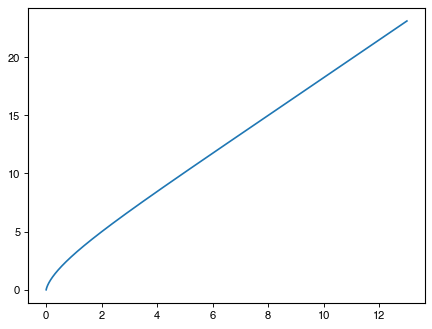

In [50]:
LO_range= np.arange(0,13,0.00001)
P_Energy_inter = interpolation_function(lightoutput_2inches,enegy_range,LO_range)
plt.plot(LO_range,P_Energy_inter)

In [82]:
for i in np.arange(10,125,5):
    globals()["dataE_"+str(int(i))+"MeV"] = globals()["data_"+str(int(i))+"MeV"].copy()
    globals()["dataE_"+str(int(i))+"MeV"]["Recoil_p_E"] = globals()["dataE_"+str(int(i))+"MeV"]['Tri_LO'].apply(lambda x:P_Energy_inter[int(x*100000)])
    globals()["dataE_"+str(int(i))+"MeV"]["Recoil_p_E_diff"] = globals()["dataE_"+str(int(i))+"MeV"]['Recoil_p_E']/globals()["dataE_"+str(int(i))+"MeV"]['Tri_pE']
    globals()["dataE_"+str(int(i))+"MeV"]["Total_E"] = globals()["dataE_"+str(int(i))+"MeV"]['Rec_nE']+globals()["dataE_"+str(int(i))+"MeV"]['Recoil_p_E']
    #print(globals()["dataE_"+str(int(i))+"MeV"].head())

In [162]:
tri_LO_threshold =0.0
rec_LO_threshold =0.0
for i in np.arange(10,125,5):
    globals()["mask_"+str(int(i))+"MeV_tri"] =  globals()["dataE_"+str(int(i))+"MeV"]['Tri_LO']>tri_LO_threshold
    globals()["mask_"+str(int(i))+"MeV_rec"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_LO']>rec_LO_threshold
    globals()["pro_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"])]
    

In [163]:
print(pro_30MeV)

       core  counts    Tri_LO   Tri_pE    Rec_nE    Rec_LO  Tri_p_num  \
0       0.0     1.0  0.341253  1.44740  1.553390  0.181120        1.0   
1       0.0     2.0  0.329425  1.41259  1.588180  0.012993        1.0   
2       0.0     3.0  0.586651  2.10270  0.898443  0.031632        1.0   
3       0.0     4.0  0.942688  2.99861  0.000029  0.000001        7.0   
4       0.0     5.0  0.461825  1.78301  1.217960  0.122064        1.0   
...     ...     ...       ...      ...       ...       ...        ...   
37053  31.0  1135.0  0.583882  2.09585  0.905293  0.068174        1.0   
37054  31.0  1136.0  0.619971  2.18443  0.816755  0.062981        1.0   
37055  31.0  1137.0  0.907751  2.93582  0.065769  0.002640        2.0   
37056  31.0  1138.0  0.530067  1.96064  1.040420  0.004669        1.0   
37057  31.0  1139.0  0.251778  1.17290  1.827730  0.047821        1.0   

       Recoil_p_E  Recoil_p_E_diff   Total_E  
0        1.447388         0.999992  3.000778  
1        1.412571         0.9

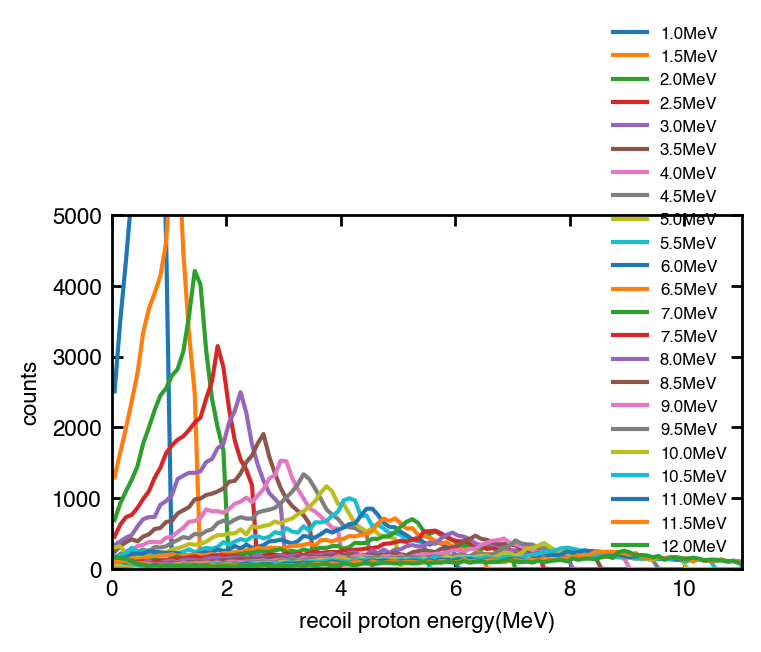

In [164]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
for i in np.arange(10,125,5):
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Recoil_p_E"] ,120,0,12)
for i in np.arange(10,125,5):
    plt.plot(axis,globals()["y_"+str(i)+"MeV"],label=str(i/10)+"MeV")
fig_post_def(xlim=(0,11),ylim=(0,5000),xlabel="recoil proton energy(MeV)",ylabel="counts")  

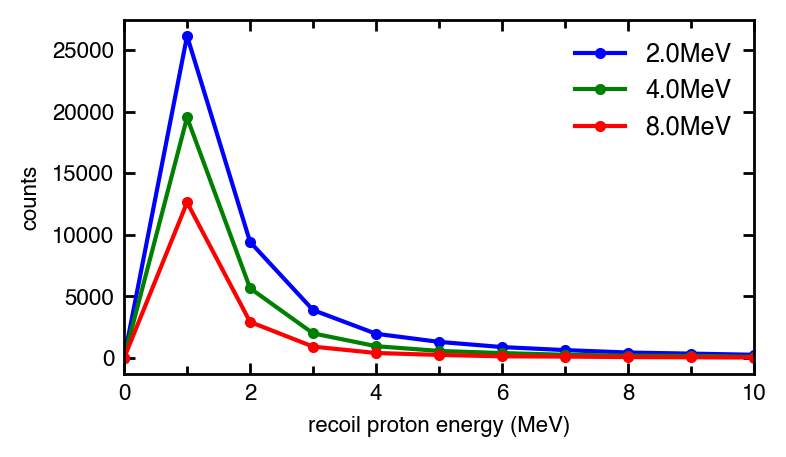

In [165]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(10,125,5):
    mask_diff = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>0
    globals()["pro_"+str(i)+"MeV_scatter"]=globals()["pro_"+str(int(i))+"MeV"][mask_diff]
    
    axis,globals()["y_"+str(i)+"MeV_eff"]=sorting(globals()["pro_"+str(int(i))+"MeV_scatter"]["Tri_p_num"] ,100,0,100)
    #axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Recoil_p_E"] ,240,0,12)


#for i in np.arange(20,100,30):
i=20
plt.plot(-0.5+axis,globals()["y_"+str(i)+"MeV_eff"],'.-b',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--b',label=str(i/10)+"MeV\nmulti-scattering")
#for i in np.arange(20,100,30):   
i=40
plt.plot(-0.5+axis,globals()["y_"+str(i)+"MeV_eff"],'.-g',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--g',label=str(i/10)+"MeV\nmulti-scattering")
#i=60
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
i=80
plt.plot(-0.5+axis,globals()["y_"+str(i)+"MeV_eff"],'.-r',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
      
fig_post_def(xlim=(0,10),xticks = (2,1)#,ylim=(0,500)
             ,lg_fs=9,n_col =1
             ,xlabel="recoil proton energy (MeV)",ylabel="counts")  
#plt.yscale('log')
#plt.ylim(1,100000)

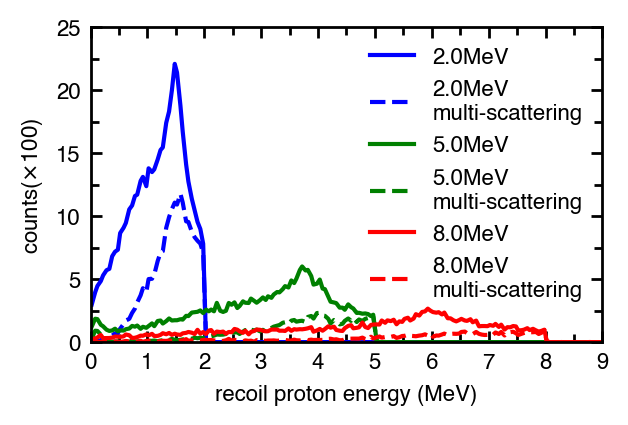

In [166]:
# Recoil proton energy in the trigger detector
fig = fig_pre_def(6.5,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
factor =100
for i in np.arange(10,125,5):
    mask_diff = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>1
    globals()["pro_"+str(i)+"MeV_scatter"]=globals()["pro_"+str(int(i))+"MeV"][mask_diff]
    
    axis,globals()["y_"+str(i)+"MeV_scatter"]=sorting(globals()["pro_"+str(int(i))+"MeV_scatter"]["Recoil_p_E"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Recoil_p_E"] ,240,0,12)


#for i in np.arange(20,100,30):
i=20
plt.plot(axis,globals()["y_"+str(i)+"MeV"]/factor,'b',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"]/factor,'--b',label=str(i/10)+"MeV\nmulti-scattering")
#for i in np.arange(20,100,30):   
i=50
plt.plot(axis,globals()["y_"+str(i)+"MeV"]/factor,'g',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"]/factor,'--g',label=str(i/10)+"MeV\nmulti-scattering")
#i=60
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
i=80
plt.plot(axis,globals()["y_"+str(i)+"MeV"]/factor,'r',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"]/factor,'--r',label=str(i/10)+"MeV\nmulti-scattering")
      
fig_post_def(xlim=(0,9),xticks = (1,0.5)#,ylim=(0,500)
             ,ylim=(0,2500/factor),yticks = (500/factor,250/factor)
             ,lg_fs=8,n_col =1
             ,xlabel="recoil proton energy (MeV)",ylabel=r"counts($\times$100)")  
#plt.yscale('log')

plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig3_simulation_recoil_proton_E.svg', format="svg")


(0.0, 4000.0)

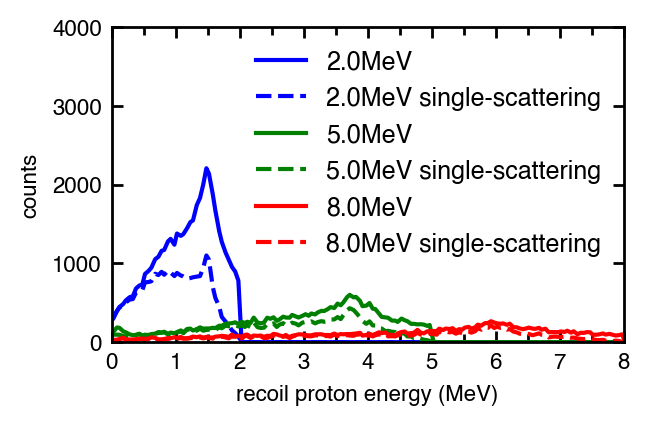

In [167]:
# Recoil proton energy in the trigger detector
fig = fig_pre_def(6.5,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(10,125,5):
    mask_diff = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>1
    globals()["pro_"+str(i)+"MeV_scatter"]=globals()["pro_"+str(int(i))+"MeV"][mask_diff]
    
    axis,globals()["y_"+str(i)+"MeV_scatter"]=sorting(globals()["pro_"+str(int(i))+"MeV_scatter"]["Recoil_p_E"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Recoil_p_E"] ,240,0,12)

    
#for i in np.arange(20,100,30):
i=20
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'b',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV"]-globals()["y_"+str(i)+"MeV_scatter"],'--b',label=str(i/10)+"MeV single-scattering")

#for i in np.arange(20,100,30):   
i=50
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'g',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV"]-globals()["y_"+str(i)+"MeV_scatter"],'--g',label=str(i/10)+"MeV single-scattering")
#i=60
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
i=80
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV"]-globals()["y_"+str(i)+"MeV_scatter"],'--r',label=str(i/10)+"MeV single-scattering")
      
fig_post_def(xlim=(0,8),xticks = (1,0.5)#,ylim=(0,500)
             ,lg_fs=9,n_col =1
             ,xlabel="recoil proton energy (MeV)",ylabel="counts")  
#plt.yscale('log')
plt.ylim(0,4000)

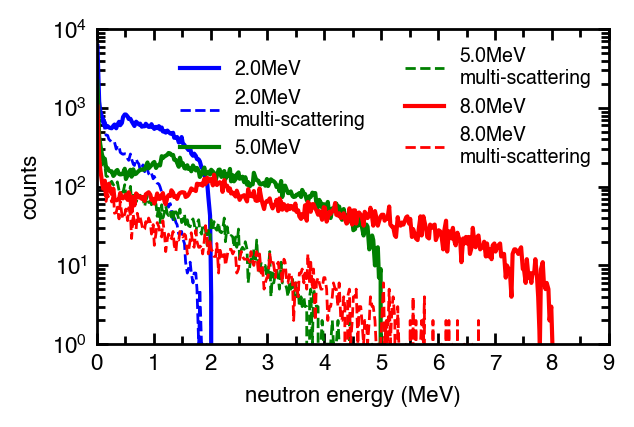

In [168]:
# Neutron energy on the recording detector
fig = fig_pre_def(6.5,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(10,125,5):
    mask_diff = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>1
    globals()["pro_"+str(i)+"MeV_scatter"]=globals()["pro_"+str(int(i))+"MeV"][mask_diff]
    
    axis,globals()["y_"+str(i)+"MeV_scatter"]=sorting(globals()["pro_"+str(int(i))+"MeV_scatter"]["Rec_nE"] ,2*240,0,12)
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Rec_nE"] ,2*240,0,12)

    
#for i in np.arange(20,100,30):
i=20
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'b',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--b',linewidth=1,label=str(i/10)+"MeV\nmulti-scattering")

#for i in np.arange(20,100,30):   
i=50
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'g',alpha = 1,label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--g',linewidth=1,label=str(i/10)+"MeV\nmulti-scattering")
#i=60
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
i=80
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',linewidth=1,label=str(i/10)+"MeV\nmulti-scattering")

fig_post_def(xlim=(0,9),xticks = (1,0.5)#,ylim=(0,500)
             ,lg_fs=7,n_col =2
             ,xlabel="neutron energy (MeV)",ylabel="counts")  
plt.yscale('log')
plt.ylim(1,10000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig3_simulation_neutron_E.svg', format="svg")


In [169]:
def gaussian(x, A,x0,sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def ER_function_improve(x,LO,A,a,b,c): #20240225THL
    Gaussian_distribution = np.zeros(len(x))
    for LO_i, A_i in zip(LO,A):
        delta_E = ((a**2)*(LO_i**2)+((b**2)*LO_i)+c**2)**0.5
        sigma_ER = delta_E/2.355
        Gaussian_distribution_temp = gaussian(x,1,LO_i,sigma_ER)
        G_sum = sum(Gaussian_distribution_temp)
        if Gaussian_distribution_temp[0]>0:
            Gaussian_distribution_temp_with_negtive = gaussian((x+(x[0]-x[-1])/2),1,LO_i,sigma_ER)# shift hallf to construct the gaussin below zero
            G_sum =sum(Gaussian_distribution_temp_with_negtive)
        #if (G_sum <= 1):
        #    G_sum =1
        Gaussian_distribution  += A_i*Gaussian_distribution_temp/G_sum
        #plt.plot(x,A_i*Gaussian_distribution_temp/G_sum)
    return Gaussian_distribution



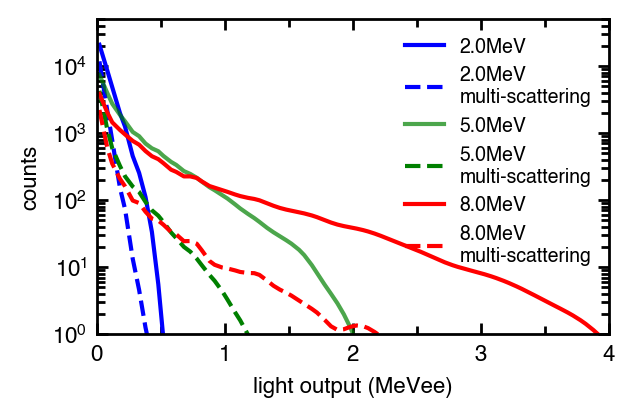

In [170]:
fig = fig_pre_def(6.5,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(10,125,5):
    mask_diff = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>1
    globals()["pro_"+str(i)+"MeV_scatter"]=globals()["pro_"+str(int(i))+"MeV"][mask_diff]
    
    axis,globals()["y_"+str(i)+"MeV_scatter"]=sorting(globals()["pro_"+str(int(i))+"MeV_scatter"]["Rec_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Rec_LO"] ,240,0,12)
    globals()["y_"+str(i)+"MeV_LO"]         = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    globals()["y_"+str(i)+"MeV_scatter_LO"] = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_scatter"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    
#for i in np.arange(20,100,30):
i=20
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'b',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--c',label=str(i/10)+"MeV\nmulti-scattering")
plt.plot(axis,globals()["y_"+str(i)+"MeV_LO"],'b',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter_LO"],'--b',label=str(i/10)+"MeV\nmulti-scattering")
 
i=50
plt.plot(axis,globals()["y_"+str(i)+"MeV_LO"],'g',alpha = 0.7,label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter_LO"],'--g',label=str(i/10)+"MeV\nmulti-scattering")
#i=60
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
i=80
plt.plot(axis,globals()["y_"+str(i)+"MeV_LO"],'r',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter_LO"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
      
fig_post_def(xlim=(0,4),xticks = (1,0.5)#,ylim=(0,500)
             ,lg_fs=7,n_col =1
             
             ,xlabel="light output (MeVee)",ylabel="counts")  
plt.yscale('log')
plt.ylim(1,50000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig3_rec_LO.svg', format="svg")

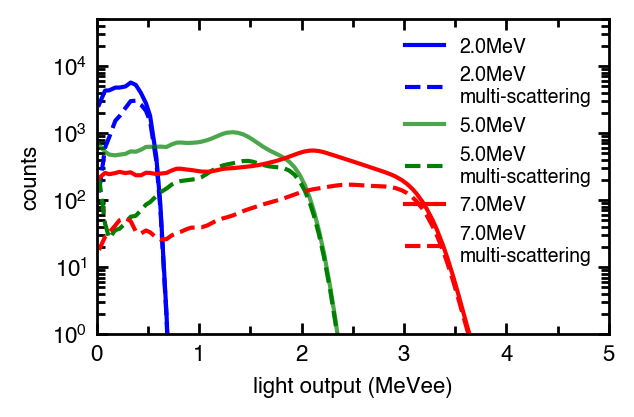

In [171]:
# light output  in the trigger detector
fig = fig_pre_def(6.5,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(10,125,5):
    mask_diff = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>1
    globals()["pro_"+str(i)+"MeV_scatter"]=globals()["pro_"+str(int(i))+"MeV"][mask_diff]
    
    axis,globals()["y_"+str(i)+"MeV_scatter"]=sorting(globals()["pro_"+str(int(i))+"MeV_scatter"]["Tri_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Tri_LO"] ,240,0,12)
    globals()["y_"+str(i)+"MeV_LO"]         = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV"],0.131,0.08,0.062)#,2.461e-02 , 4.063e-02 , 7.418e-02)
    globals()["y_"+str(i)+"MeV_scatter_LO"] = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_scatter"],0.131,0.08,0.062)#,2.461e-02 , 4.063e-02 , 7.418e-02)
    
#for i in np.arange(20,100,30):
i=20
plt.plot(axis,globals()["y_"+str(i)+"MeV_LO"],'b',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter_LO"],'--b',label=str(i/10)+"MeV\nmulti-scattering")

#for i in np.arange(20,100,30):   
i=50
plt.plot(axis,globals()["y_"+str(i)+"MeV_LO"],'g',alpha = 0.7,label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter_LO"],'--g',label=str(i/10)+"MeV\nmulti-scattering")
#i=60
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
i=70
plt.plot(axis,globals()["y_"+str(i)+"MeV_LO"],'r',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter_LO"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
      
fig_post_def(xlim=(0,5),xticks = (1,0.5)#,ylim=(0,500)
             ,lg_fs=7,n_col =1
             ,xlabel="light output (MeVee)",ylabel="counts")  
plt.yscale('log')
plt.ylim(1,50000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig3_tri_LO.svg', format="svg")

In [172]:
pro_60MeV_scatter

,core,counts,Tri_LO,Tri_pE,Rec_nE,Rec_LO,Tri_p_num,Recoil_p_E,Recoil_p_E_diff,Total_E
2,0.0,3.0,2.52278,5.95886,0.036161,0.001359,2.0,5.931836,0.995465,5.967997
3,0.0,4.0,1.26217,3.91678,2.085350,0.332751,2.0,3.586962,0.915794,5.672312
11,0.0,12.0,2.26980,5.58745,0.415573,0.023978,2.0,5.482885,0.981286,5.898458
14,0.0,15.0,1.83244,5.58672,0.000082,0.000001,9.0,4.686062,0.838786,4.686144
17,0.0,18.0,1.20818,4.40790,1.594490,0.186454,3.0,3.477739,0.788979,5.072229
...,...,...,...,...,...,...,...,...,...,...
23273,31.0,731.0,1.27000,3.75659,1.714810,0.061955,2.0,3.602710,0.959037,5.317520
23280,31.0,738.0,2.14690,5.71929,0.283810,0.008531,3.0,5.261923,0.920031,5.545733
23282,31.0,740.0,2.36552,5.95460,0.048626,0.000811,3.0,5.653628,0.949455,5.702254
23285,31.0,743.0,1.77349,5.52716,0.399363,0.022485,2.0,4.576143,0.827938,4.975506


In [173]:
mask = pro_60MeV_scatter["Tri_LO"]<0.3
pro_60MeV_scatter_03=pro_60MeV_scatter[mask]
print(pro_60MeV_scatter_03)

       core  counts    Tri_LO    Tri_pE    Rec_nE    Rec_LO  Tri_p_num  \
21      0.0    22.0  0.131298  0.831996  0.026120  0.000091        4.0   
23      0.0    24.0  0.032432  0.313350  0.915175  0.084245        2.0   
30      0.0    31.0  0.138072  1.055410  0.000588  0.000020        9.0   
67      0.0    68.0  0.175230  1.089080  0.322819  0.019860        2.0   
72      0.0    73.0  0.055801  0.513438  0.278055  0.002018        3.0   
...     ...     ...       ...       ...       ...       ...        ...   
22970  31.0   428.0  0.215989  1.179390  0.000454  0.000013        9.0   
23119  31.0   577.0  0.123887  0.784813  0.007686  0.000275        4.0   
23166  31.0   624.0  0.260342  1.372450  0.050939  0.001785        3.0   
23232  31.0   690.0  0.115963  0.784689  0.458703  0.005732        2.0   
23266  31.0   724.0  0.073622  0.640523  0.387769  0.006831        4.0   

       Recoil_p_E  Recoil_p_E_diff   Total_E  
21       0.743738         0.893920  0.769858  
23       0.269286

In [174]:
Ep_x = np.arange(0,10,0.001)
LO_x = np.arange(0,10,0.001)
Ep_y = np.zeros(1000)
Ep_y[0] = 2
LO_y = ER_function_improve(LO_x,Ep_x,Ep_y,0.1,0.2,0.3)


1.0031316969011534


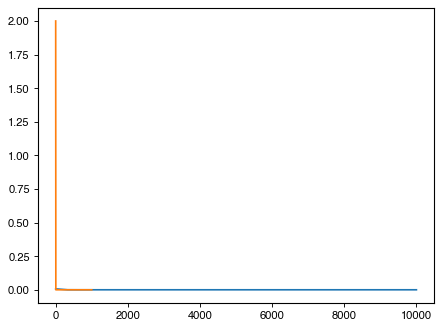

In [175]:
plt.plot(LO_y)
plt.plot(Ep_y)
print(sum(LO_y))

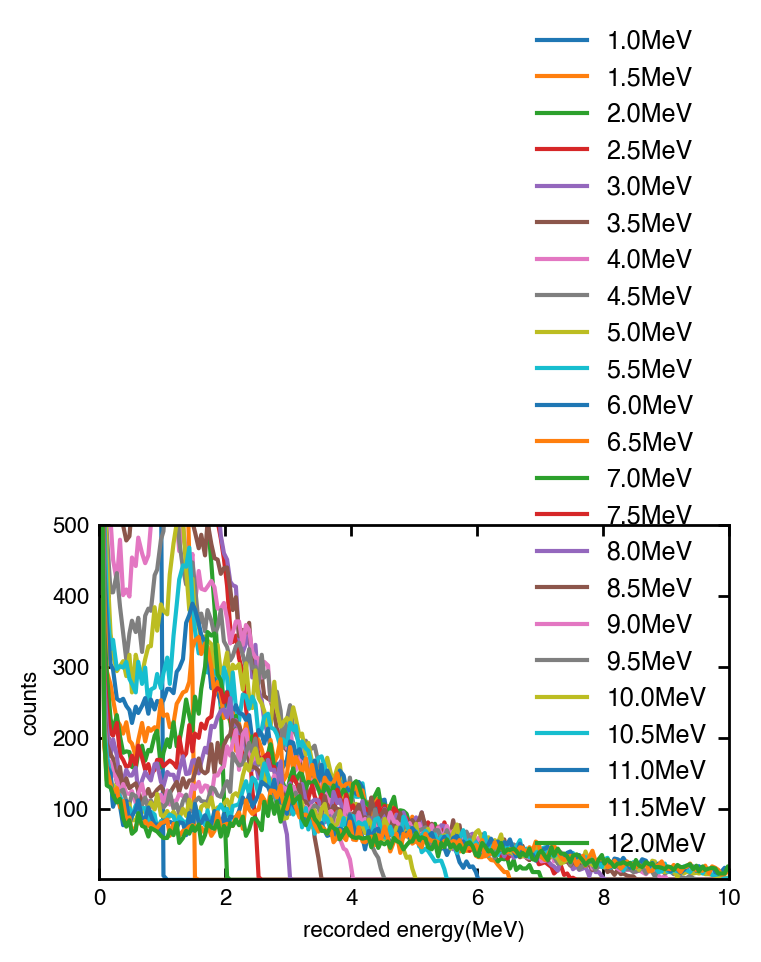

In [176]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(10,125,5):
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Rec_nE"] ,240,0,12)
for i in np.arange(10,125,5):
    plt.plot(axis,globals()["y_"+str(i)+"MeV"],label=str(i/10)+"MeV")
fig_post_def(xlim=(0,10),ylim=(1,500),lg_fs=9,
             xlabel="recorded energy(MeV)",ylabel="counts")  

(10, 10000)

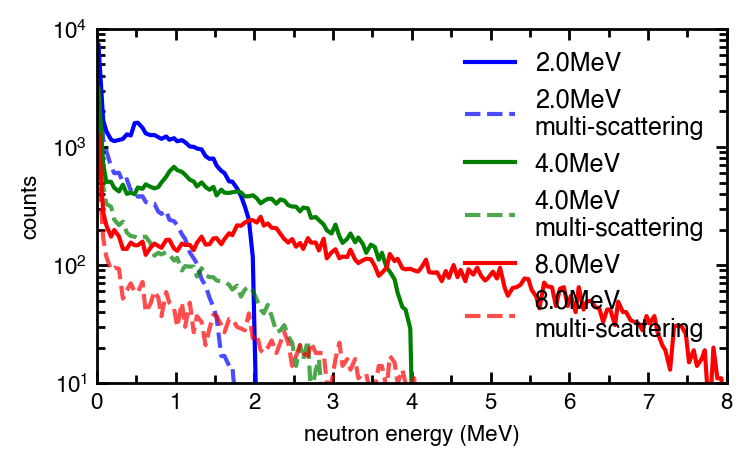

In [177]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(10,125,5):
    mask_diff = globals()["pro_"+str(int(i))+"MeV"]["Recoil_p_E_diff"]<0.95
    globals()["pro_"+str(i)+"MeV_scatter"]=globals()["pro_"+str(int(i))+"MeV"][mask_diff]
    axis,globals()["y_"+str(i)+"MeV_scatter"]=sorting(globals()["pro_"+str(int(i))+"MeV_scatter"]["Rec_nE"] ,240,0,12)

    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Rec_nE"] ,240,0,12)
    #ER_function_improve
i=20
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'b',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"] ,'--b',alpha=0.7, label=str(i/10)+"MeV\nmulti-scattering")
i=40
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'g',alpha=1,label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--g',alpha=0.7,label=str(i/10)+"MeV\nmulti-scattering")
i=80
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',alpha=1,label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',alpha=0.7,label=str(i/10)+"MeV\nmulti-scattering")

fig_post_def(xlim=(0,8),xticks = (1,0.5),ylim=(0,300)
             ,lg_fs=9,n_col =1
             ,xlabel="neutron energy (MeV)",ylabel="counts")  
plt.yscale('log')
plt.ylim(10,10000)
#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/mono_test.svg', format="svg")

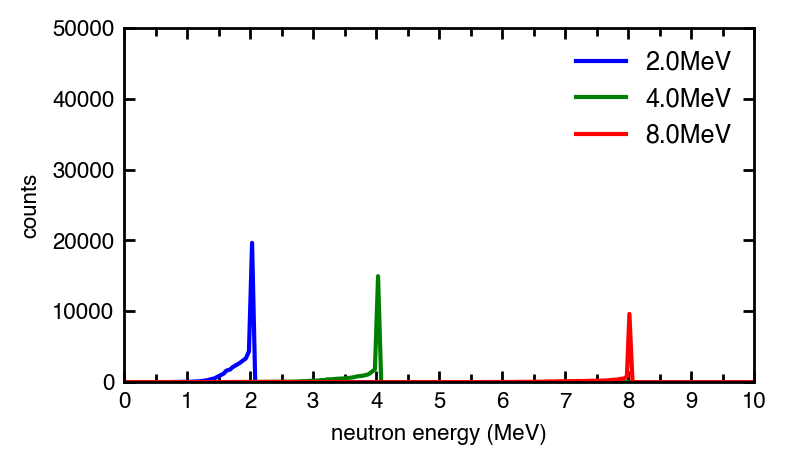

In [178]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(10,115,5):
    mask_diff = globals()["pro_"+str(int(i))+"MeV"]["Recoil_p_E_diff"]>0
    globals()["pro_"+str(i)+"MeV_scatter"]=globals()["pro_"+str(int(i))+"MeV"][mask_diff]

    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Total_E"] ,240,0,12)
i=20
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'b',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"] ,'--b',alpha=0.7, label=str(i/10)+"MeV\nmulti-scattering")
i=40
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'g',alpha=1,label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--g',alpha=0.7,label=str(i/10)+"MeV\nmulti-scattering")
i=80
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',alpha=1,label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',alpha=0.7,label=str(i/10)+"MeV\nmulti-scattering")

fig_post_def(xlim=(0,10),xticks = (1,0.5),ylim=(0,50000)
             ,lg_fs=9,n_col =1
             ,xlabel="neutron energy (MeV)",ylabel="counts")  
#plt.yscale('log')
#plt.ylim(1,10000)
#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/mono_test.svg', format="svg")

(1.0, 250.0)

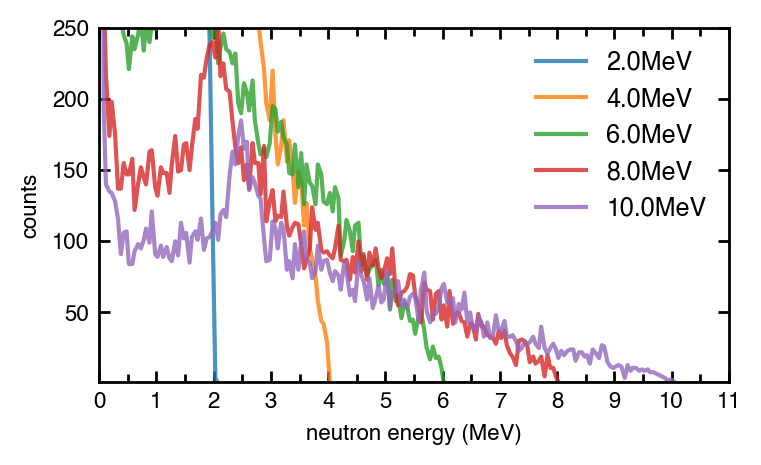

In [179]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
for i in np.arange(20,120,20):
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Rec_nE"] ,240,0,12)
for i in np.arange(20,120,20):
    plt.plot(axis,globals()["y_"+str(i)+"MeV"],alpha = 0.8,label=str(i/10)+"MeV")
fig_post_def(xlim=(0,11),xticks = (1,0.5)#,ylim=(0,500)
             ,lg_fs=9
             ,xlabel="neutron energy (MeV)",ylabel="counts")  
#plt.yscale('log')
plt.ylim(1,250)

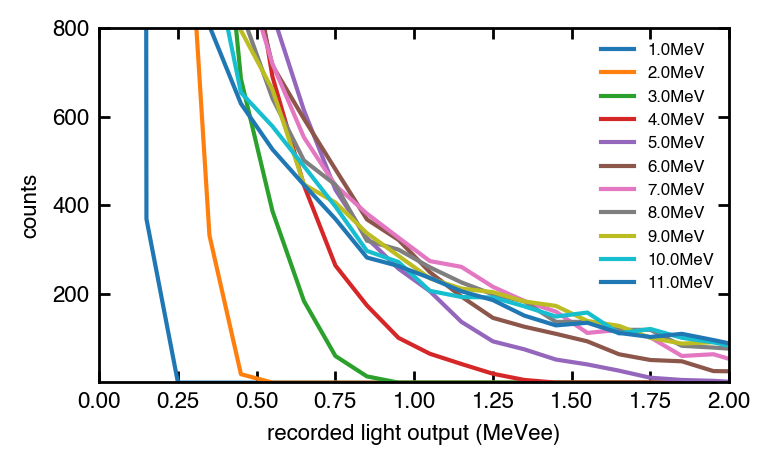

In [180]:




fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
for i in np.arange(10,120,10):
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Rec_LO"] ,100,0,10)
for i in np.arange(10,120,10):
    plt.plot(axis,globals()["y_"+str(i)+"MeV"],label=str(i/10)+"MeV")
fig_post_def(xlim=(0,2),ylim=(1,800),xlabel="recorded light output (MeVee)",ylabel="counts")  

In [181]:
#fig = fig_pre_def(8,8,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)  

#plt.hist2d(pro_20MeV['Recoil_p_E'],pro_20MeV['Rec_nE'], bins=(200, 200),cmin=1, cmap=plt.cm.jet)


#  Tri = 0 /Rec =0

In [182]:
def bar_plot(input_x,input_y,binning):
    xs = [input_x[0] - binning/2]
    ys = [0]
    for i in range(len(input_x)):
        xs.append(input_x[i] - binning/2)
        xs.append(input_x[i] + binning/2)
        ys.append(input_y[i])
        ys.append(input_y[i])
    xs.append(input_x[-1] + binning/2)
    ys.append(0)
    return np.array(xs),np.array(ys)

In [199]:
tri_LO_threshold =0.0
rec_LO_threshold =0.0
for i in np.arange(10,125,5):
    globals()["mask_"+str(int(i))+"MeV_tri"] =  globals()["dataE_"+str(int(i))+"MeV"]['Tri_LO']>tri_LO_threshold
    globals()["mask_"+str(int(i))+"MeV_rec"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_LO']>rec_LO_threshold
    globals()["pro_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"])]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


efficiency:  [59746. 52078. 46068. 40795. 37058. 32877. 30235. 28598. 26880. 25129.
 23289. 21717. 20538. 18901. 17751. 16744. 15800. 14747. 14210. 13669.
 13245. 12538. 12025.]


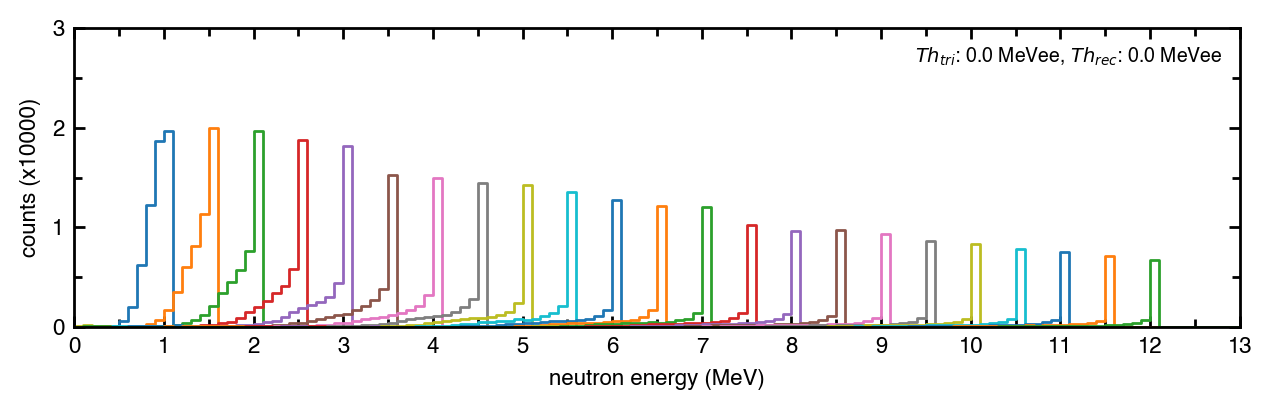

In [201]:
fig = fig_pre_def(14.8,3.8,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
eff = [] 
divider =10000
for i in np.arange(10,125,5):
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Total_E"] ,130,0,13)
    #print(globals()["y_"+str(i)+"MeV"])
    eff = np.append(eff, sum(globals()["y_"+str(i)+"MeV"]))
    bar_axis,globals()["bar_y_"+str(i)+"MeV"] = bar_plot(axis,globals()["y_"+str(i)+"MeV"],13/130)
print("efficiency: ",eff)
for i in np.arange(10,125,5):
    #plt.plot(axis,globals()["y_"+str(i)+"MeV"]/divider,label=str(i/10)+" MeV",linewidth =1.5)
    plt.plot(bar_axis,globals()["bar_y_"+str(i)+"MeV"]/divider,linewidth =1#,label=str(i/10)+"MeV"
             )
    
fig_post_def(xlim=(0,13),ylim=(0,30000/divider)
             ,xticks = (1,0.5),yticks = (10000/divider,5000/divider)
             ,xlabel="neutron energy (MeV)",ylabel="counts (x10000)"
             ,lg_fs=7,n_col =4
             ,title = r'$Th_{tri}$: '+ str(tri_LO_threshold)+ ' MeVee, $Th_{rec}$: '+ str(rec_LO_threshold)+' MeVee') 
#plt.yscale('log')
#plt.ylim(10,1000000)

plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig2_simulation_ret_E_0_0.svg', format="svg")


#  Tri = 0.0 /Rec =0.4

In [209]:
tri_LO_threshold =0.125
rec_LO_threshold =0.125
for i in np.arange(10,125,5):
    globals()["mask_"+str(int(i))+"MeV_tri"] =  globals()["dataE_"+str(int(i))+"MeV"]['Tri_LO']>tri_LO_threshold
    globals()["mask_"+str(int(i))+"MeV_rec"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_LO']>rec_LO_threshold
    globals()["pro_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"])]

/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_22973/448189029.py:18: RuntimeWarning: invalid value encountered in scalar divide
  peak_ratio_0125 = np.append(peak_ratio_0125,globals()["y_"+str(i)+"MeV"][i]/sum(globals()["y_"+str(i)+"MeV"]))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


120  .   [    0.     0.  1048.  4252.  6641.  7823.  8991.  9888. 10205. 10273.
 10107. 10061. 10160.  9366.  9201.  9047.  8850.  8449.  8131.  7916.
  7614.  7336.  7075.]
8916.277777777777
[       nan        nan 0.80725191 0.73753528 0.73407619 0.68119647
 0.70014459 0.69518608 0.71984321 0.73561764 0.7450282  0.74346486
 0.76899606 0.71866325 0.71361808 0.74610368 0.75344633 0.73712865
 0.74185217 0.73281961 0.72957709 0.73323337 0.72848057]


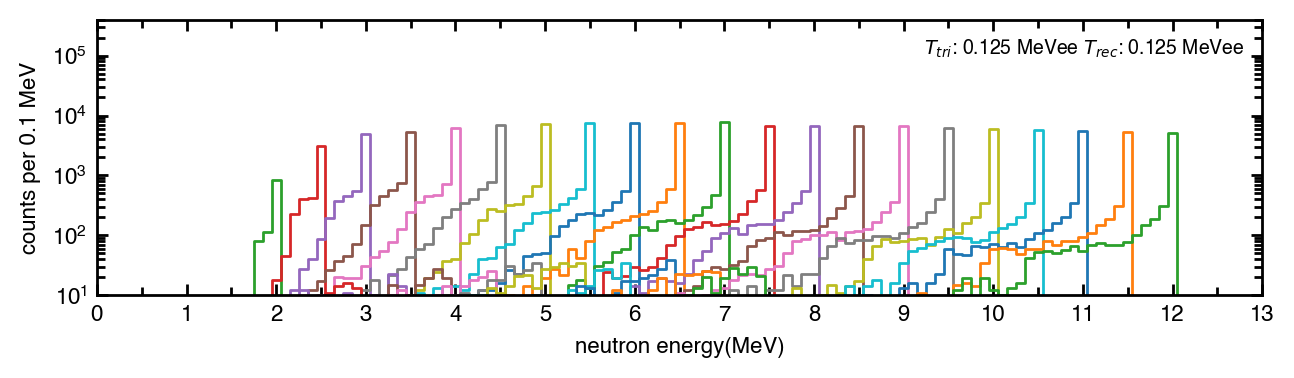

In [210]:
fig = fig_pre_def(14.8,3.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
eff = [] 
divider =1
for i in np.arange(10,125,5):
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Total_E"] ,130,0,13)
    #print(globals()["y_"+str(i)+"MeV"])
    eff = np.append(eff, sum(globals()["y_"+str(i)+"MeV"]))
    bar_axis,globals()["bar0125_y_"+str(i)+"MeV"] = bar_plot(axis,globals()["y_"+str(i)+"MeV"],13/130)
print(i," .  ",eff)
print(np.average(eff[5:]))
peak_ratio_0125= []
for i in np.arange(10,125,5):
    #plt.plot(axis,globals()["y_"+str(i)+"MeV"]/divider,linewidth =1.2)#,label=str(i/10)+"MeV")
    plt.plot(-0.05+bar_axis,globals()["bar0125_y_"+str(i)+"MeV"]/divider,linewidth =1#,label=str(i/10)+"MeV"
             )

    peak_ratio_0125 = np.append(peak_ratio_0125,globals()["y_"+str(i)+"MeV"][i]/sum(globals()["y_"+str(i)+"MeV"]))
print(peak_ratio_0125)
fig_post_def(xlim=(0,13),xticks = (1,0.5)
             ,ylim=(0,12000/divider),yticks = (2000/divider,1000/divider)
             ,xlabel="neutron energy(MeV)",ylabel="counts per 0.1 MeV"
             ,lg_fs=7,n_col =6
             ,title = r'$T_{tri}$: '+ str(tri_LO_threshold)+ ' MeVee $T_{rec}$: '+ str(rec_LO_threshold)+' MeVee') 
plt.yscale('log')
plt.ylim(10,400000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig2_simulation_ret_E_0125_0125.svg', format="svg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


efficiency:  [59746. 52078. 46068. 40795. 37058. 32877. 30235. 28598. 26880. 25129.
 23289. 21717. 20538. 18901. 17751. 16744. 15800. 14747. 14210. 13669.
 13245. 12538. 12025.]
120  .   [59746. 52078. 46068. 40795. 37058. 32877. 30235. 28598. 26880. 25129.
 23289. 21717. 20538. 18901. 17751. 16744. 15800. 14747. 14210. 13669.
 13245. 12538. 12025.]
20839.526315789473
[0.32966224 0.38405853 0.42673873 0.45892879 0.489395   0.46527968
 0.49465851 0.50650395 0.52875744 0.53762585 0.5475117  0.55753557
 0.58696076 0.54150574 0.54284266 0.58176063 0.59025316 0.58642436
 0.59014778 0.57297535 0.56912042 0.57162227 0.5624948 ]


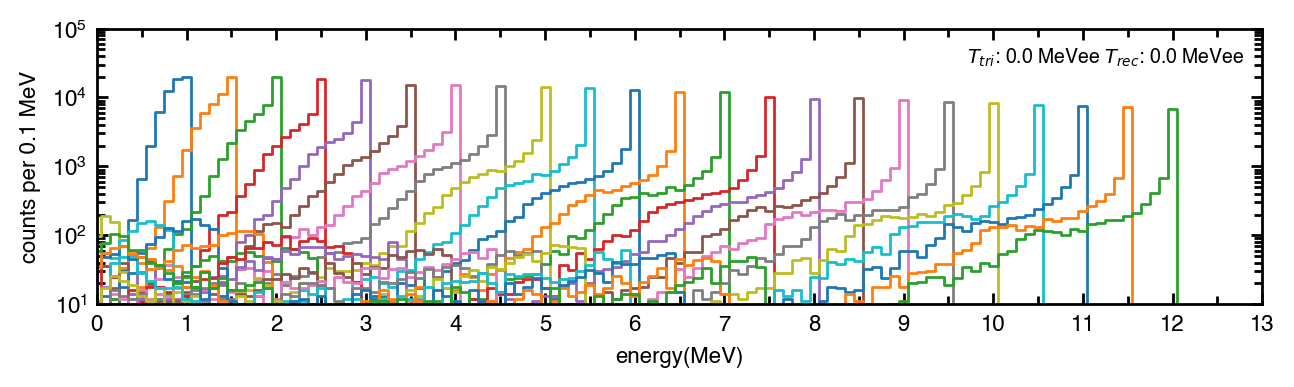

In [211]:
tri_LO_threshold =0.0
rec_LO_threshold =0.0
for i in np.arange(10,125,5):
    globals()["mask_"+str(int(i))+"MeV_tri"] =  globals()["dataE_"+str(int(i))+"MeV"]['Tri_LO']>tri_LO_threshold
    globals()["mask_"+str(int(i))+"MeV_rec"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_LO']>rec_LO_threshold
    globals()["pro_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"])]
fig = fig_pre_def(14.8,3.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
eff = [] 
divider=1
for i in np.arange(10,125,5):
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Total_E"] ,130,0,13)
    #print(globals()["y_"+str(i)+"MeV"])
    eff = np.append(eff, sum(globals()["y_"+str(i)+"MeV"]))
    bar_axis,globals()["bar05_y_"+str(i)+"MeV"] = bar_plot(axis,globals()["y_"+str(i)+"MeV"],13/130)
    
print("efficiency: ",eff)
print(i," .  ",eff)
print(np.average(eff[4:]))
peak_ratio_05=[]
for i in np.arange(10,125,5):
    #plt.plot(axis,globals()["y_"+str(i)+"MeV"]/divider,linewidth =1.2)#,label=str(i/10)+"MeV")
    plt.plot(-0.05+bar_axis,globals()["bar05_y_"+str(i)+"MeV"]/divider,linewidth =1#,label=str(i/10)+"MeV"
             )
    peak_ratio_05 = np.append(peak_ratio_05,globals()["y_"+str(i)+"MeV"][i]/sum(globals()["y_"+str(i)+"MeV"]))
print(peak_ratio_05)

fig_post_def(xlim=(0,13),ylim=(0,6000/divider)
             ,xlabel="energy(MeV)",ylabel="counts per 0.1 MeV"
             ,xticks = (1,0.5),yticks = (1000/divider,500/divider)
             ,lg_fs=7,n_col =2
             ,title = r'$T_{tri}$: '+ str(tri_LO_threshold)+ ' MeVee $T_{rec}$: '+ str(rec_LO_threshold)+' MeVee') 
plt.yscale('log')
plt.ylim(10,100000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig2_simulation_ret_E_0125_05.svg', format="svg")

#  Tri = 0.2 /Rec =0

In [212]:
tri_LO_threshold =0.125
rec_LO_threshold =0.5
for i in np.arange(10,125,5):
    globals()["mask_"+str(int(i))+"MeV_tri"] =  globals()["dataE_"+str(int(i))+"MeV"]['Tri_LO']>tri_LO_threshold
    globals()["mask_"+str(int(i))+"MeV_rec"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_LO']>rec_LO_threshold
    globals()["pro_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"])]

/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_22973/2772210527.py:22: RuntimeWarning: invalid value encountered in scalar divide
  peak_ratio_03 = np.append(peak_ratio_03,globals()["y_"+str(i)+"MeV"][i]/sum(globals()["y_"+str(i)+"MeV"]))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


120  .   [   0.    0.    0.    0.   31.  435. 1066. 1841. 2462. 2933. 3225. 3665.
 3940. 3905. 3968. 4154. 4150. 4130. 4177. 4245. 4216. 4138. 4105.]
[       nan        nan        nan        nan 0.93548387 0.79770115
 0.78705441 0.74090168 0.74939074 0.76235936 0.77581395 0.779809
 0.79771574 0.75595391 0.74647177 0.7768416  0.78       0.77336562
 0.77639454 0.77149588 0.76541746 0.77694538 0.76126675]


(10, 100000)

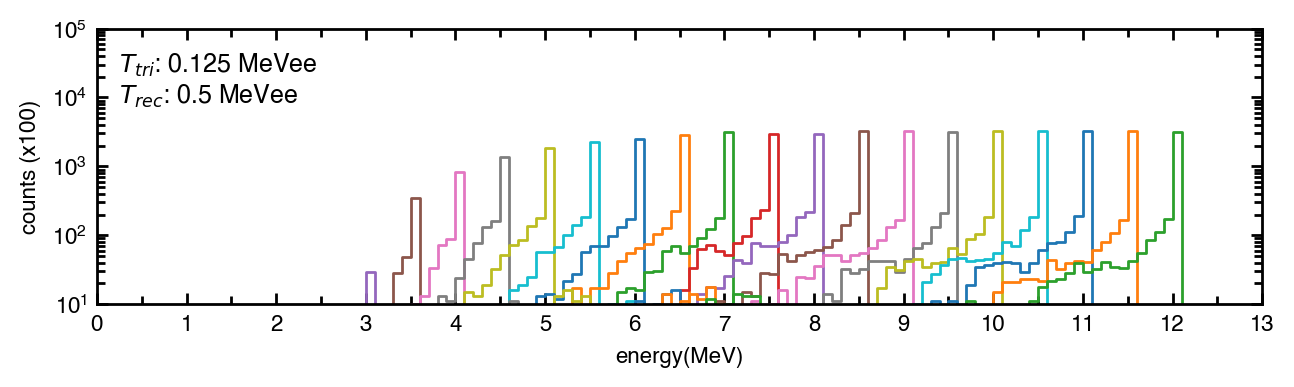

In [214]:
tri_LO_threshold =0.125
rec_LO_threshold =0.5
for i in np.arange(10,125,5):
    globals()["mask_"+str(int(i))+"MeV_tri"] =  globals()["dataE_"+str(int(i))+"MeV"]['Tri_LO']>tri_LO_threshold
    globals()["mask_"+str(int(i))+"MeV_rec"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_LO']>rec_LO_threshold
    globals()["pro_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"])]
fig = fig_pre_def(14.8,3.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
eff = [] 
divider =1
for i in np.arange(10,125,5):
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Total_E"] ,130,0,13)
    #print(globals()["y_"+str(i)+"MeV"])
    bar_axis,globals()["bar03_y_"+str(i)+"MeV"] = bar_plot(axis,globals()["y_"+str(i)+"MeV"],13/130)
    eff = np.append(eff, sum(globals()["y_"+str(i)+"MeV"]))
print(i," .  ",eff)
peak_ratio_03=[]
for i in np.arange(10,125,5):
    #plt.plot(axis,globals()["y_"+str(i)+"MeV"]/divider,linewidth =1.2)#,label=str(i/10)+"MeV")
    plt.plot(bar_axis,globals()["bar03_y_"+str(i)+"MeV"]/divider,linewidth =1#,label=str(i/10)+"MeV"
             )
    peak_ratio_03 = np.append(peak_ratio_03,globals()["y_"+str(i)+"MeV"][i]/sum(globals()["y_"+str(i)+"MeV"]))
print(peak_ratio_03)

fig_post_def(xlim=(0,13)#,ylim=(0,8000/divider)
             ,xticks = (1,0.5)#,yticks = (2000/divider,500/divider)
             ,xlabel="energy(MeV)",ylabel="counts (x100)"
             ,lg_fs=9,n_col =2
             ,title = r'$T_{tri}$: '+ str(tri_LO_threshold)+ ' MeVee\n$T_{rec}$: '+ str(rec_LO_threshold)+' MeVee') 
plt.yscale('log')
plt.ylim(10,100000)
#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/NSTOF_simulation_threshold_3.svg', format="svg")

# tri = 0.2/ Rec= 0.3

efficiency:  [   0.    0.    0.    0. 1013. 2520. 3901. 4283. 4805. 4967. 4925. 5020.]
120  .   [   0.    0.    0.    0. 1013. 2520. 3901. 4283. 4805. 4967. 4925. 5020.]
3929.25
[       nan        nan        nan        nan 0.8124383  0.78253968
 0.77492951 0.72495914 0.78668054 0.78477954 0.76243655 0.7749004 ]


/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_1663/3410053969.py:24: RuntimeWarning: invalid value encountered in scalar divide
  peak_ratio_05 = np.append(peak_ratio_05,globals()["y_"+str(i)+"MeV"][i]/sum(globals()["y_"+str(i)+"MeV"]))


(1, 12000)

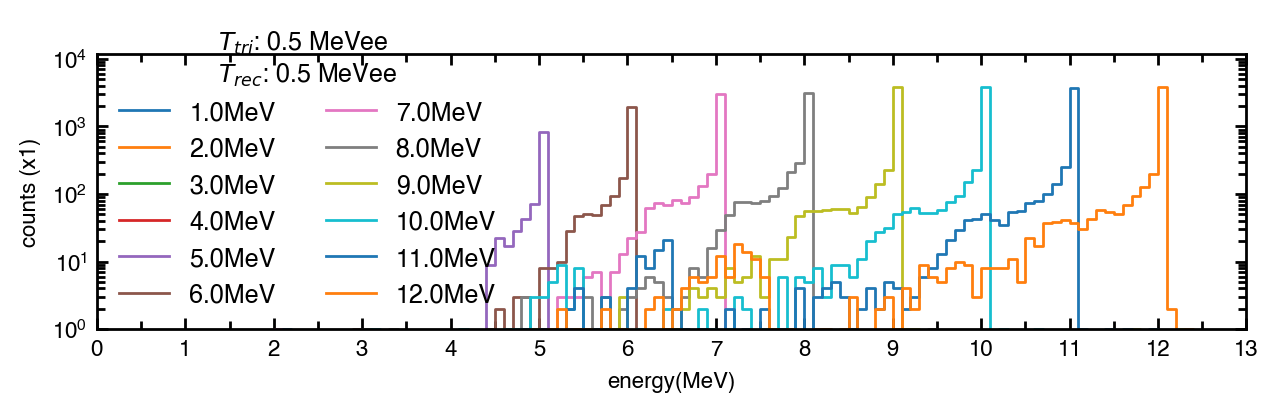

In [597]:
tri_LO_threshold =0.5
rec_LO_threshold =0.5
for i in np.arange(10,130,10):
    globals()["mask_"+str(int(i))+"MeV_tri"] =  globals()["dataE_"+str(int(i))+"MeV"]['Tri_LO']>tri_LO_threshold
    globals()["mask_"+str(int(i))+"MeV_rec"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_LO']>rec_LO_threshold
    globals()["pro_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"])]
fig = fig_pre_def(14.6,3.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
eff = [] 
divider=1
for i in np.arange(10,130,10):
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Total_E"] ,130,0,13)
    #print(globals()["y_"+str(i)+"MeV"])
    eff = np.append(eff, sum(globals()["y_"+str(i)+"MeV"]))

    bar_axis,globals()["bar05_y_"+str(i)+"MeV"] = bar_plot(axis,globals()["y_"+str(i)+"MeV"],13/130)
print("efficiency: ",eff)
print(i," .  ",eff)
print(np.average(eff[4:]))
peak_ratio_05=[]
for i in np.arange(10,130,10):
    #plt.plot(axis,globals()["y_"+str(i)+"MeV"]/divider,linewidth =1.2)#,label=str(i/10)+"MeV")
    plt.plot(bar_axis,globals()["bar05_y_"+str(i)+"MeV"]/divider,label=str(i/10)+"MeV",linewidth =1)
    peak_ratio_05 = np.append(peak_ratio_05,globals()["y_"+str(i)+"MeV"][i]/sum(globals()["y_"+str(i)+"MeV"]))
print(peak_ratio_05)

fig_post_def(xlim=(0,13),ylim=(0,6000/divider)
             ,xlabel="energy(MeV)",ylabel="counts (x"+str(divider)+")"
             ,xticks = (1,0.5),yticks = (1000/divider,500/divider)
             ,lg_fs=9,n_col =2
             ,title = r'$T_{tri}$: '+ str(tri_LO_threshold)+ ' MeVee\n$T_{rec}$: '+ str(rec_LO_threshold)+' MeVee') 
plt.yscale('log')
plt.ylim(1,12000)
#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/NSTOF_simulation_threshold_4.svg', format="svg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0001, 1.2)

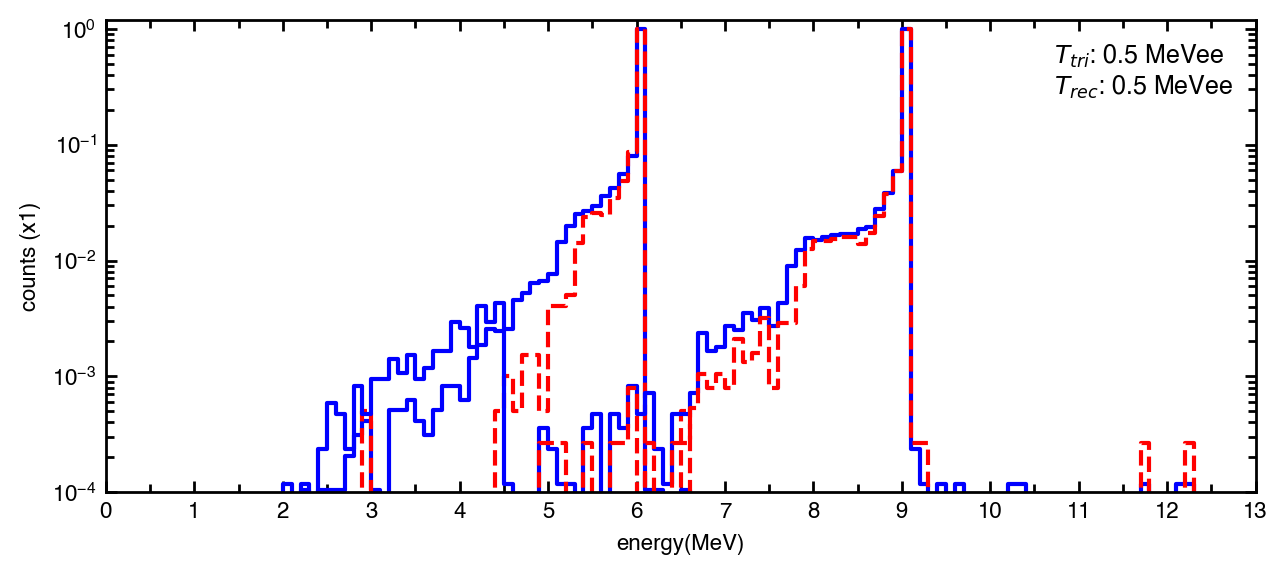

In [598]:
fig = fig_pre_def(14.6,6,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(60,120,30):
    plt.plot(bar_axis,globals()["bar0125_y_"+str(i)+"MeV"]/max(globals()["bar0125_y_"+str(i)+"MeV"]),'b')#,label=str(i/10)+"MeV",linewidth =1)
    plt.plot(bar_axis,globals()["bar05_y_"+str(i)+"MeV"]/max(globals()["bar05_y_"+str(i)+"MeV"]),'--r')#,label=str(i/10)+"MeV",linewidth =1)
    #peak_ratio_05 = np.append(peak_ratio_05,sum(globals()["y_"+str(i)+"MeV"][i-1:i+1])/sum(globals()["y_"+str(i)+"MeV"]))
#print(peak_ratio_05)

fig_post_def(xlim=(0,13),ylim=(0,1.2/divider)
             ,xlabel="energy(MeV)",ylabel="counts (x"+str(divider)+")"
             ,xticks = (1,0.5),yticks = (1000/divider,500/divider)
             ,lg_fs=9,n_col =2
             ,title = r'$T_{tri}$: '+ str(tri_LO_threshold)+ ' MeVee\n$T_{rec}$: '+ str(rec_LO_threshold)+' MeVee') 
plt.yscale('log')
plt.ylim(0.0001,1.2)
#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/NSTOF_simulation_threshold_4.svg', format="svg")

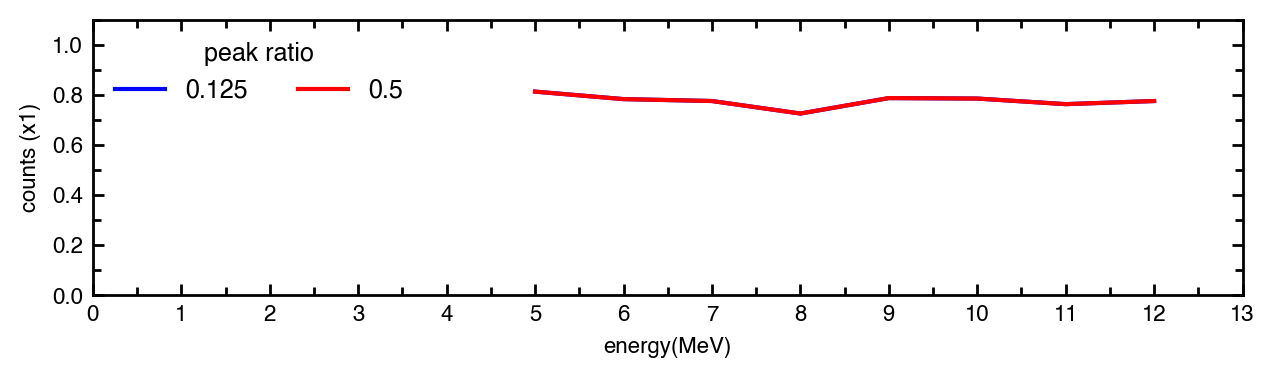

In [591]:
fig = fig_pre_def(14.6,3.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
peak_ratio_x = np.arange(1,13,1)
plt.plot(peak_ratio_x,peak_ratio_0125,'b',label = '0.125')
plt.plot(peak_ratio_x,peak_ratio_05,'r',label = '0.5')
fig_post_def(xlim=(0,13),ylim=(0,1.1)
             ,xlabel="energy(MeV)",ylabel="counts (x"+str(divider)+")"
             ,xticks = (1,0.5),yticks = (0.2,0.1)
             ,lg_fs=9,n_col =2
             ,title = r'peak ratio') 

#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/NSTOF_simulation_threshold_4.svg', format="svg")

In [561]:
tri_LO_threshold =0.5
rec_LO_threshold =0.5
for i in np.arange(10,130,10):
    globals()["mask_"+str(int(i))+"MeV_tri"] =  globals()["dataE_"+str(int(i))+"MeV"]['Tri_LO']>tri_LO_threshold
    globals()["mask_"+str(int(i))+"MeV_rec"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_LO']>rec_LO_threshold
    globals()["pro_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"])]

efficiency:  [   0.    0.    0.    0. 1013. 2520. 3901. 4283. 4805. 4967. 4925. 5020.]
120  .   [   0.    0.    0.    0. 1013. 2520. 3901. 4283. 4805. 4967. 4925. 5020.]
3929.25
3105 884


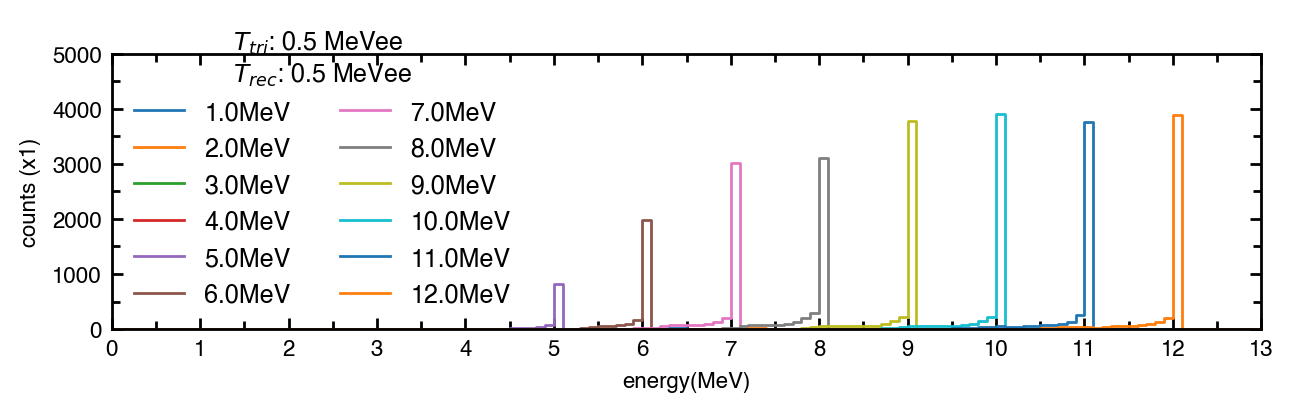

In [562]:
fig = fig_pre_def(14.6,3.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
eff = [] 
divider=1
for i in np.arange(10,130,10):
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Rec_nE"]+globals()["pro_"+str(int(i))+"MeV"]["Recoil_p_E"] ,130,0,13)
    #print(globals()["y_"+str(i)+"MeV"])
    eff = np.append(eff, sum(globals()["y_"+str(i)+"MeV"]))

    bar_axis,globals()["bar_y_"+str(i)+"MeV"] = bar_plot(axis,globals()["y_"+str(i)+"MeV"],13/130)
print("efficiency: ",eff)
print(i," .  ",eff)
print(np.average(eff[4:]))
for i in np.arange(10,130,10):
    #plt.plot(axis,globals()["y_"+str(i)+"MeV"]/divider,linewidth =1.2)#,label=str(i/10)+"MeV")
    plt.plot(bar_axis,globals()["bar_y_"+str(i)+"MeV"]/divider,label=str(i/10)+"MeV",linewidth =1)
print(y_80MeV[80],sum(y_80MeV[0:79]))
fig_post_def(xlim=(0,13),ylim=(0,5000/divider)
             ,xlabel="energy(MeV)",ylabel="counts (x"+str(divider)+")"
             ,xticks = (1,0.5),yticks = (1000/divider,500/divider)
             ,lg_fs=9,n_col =2
             ,title = r'$T_{tri}$: '+ str(tri_LO_threshold)+ ' MeVee\n$T_{rec}$: '+ str(rec_LO_threshold)+' MeVee') 

#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/NSTOF_simulation_threshold_4.svg', format="svg")

In [26]:
tri_LO_threshold =0.2
rec_LO_threshold =0.50
for i in np.arange(10,120,10):
    globals()["mask_"+str(int(i))+"MeV_tri"] =  globals()["dataE_"+str(int(i))+"MeV"]['Tri_LO']>tri_LO_threshold
    globals()["mask_"+str(int(i))+"MeV_rec"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_LO']>rec_LO_threshold
    globals()["pro_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"])]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


110  .   [  0.   0.   0. 104. 312. 430. 509. 504. 548. 584. 536.]
110  . max eff   [  0.   0.   0.  82. 253. 322. 405. 361. 426. 455. 393.]
489.0


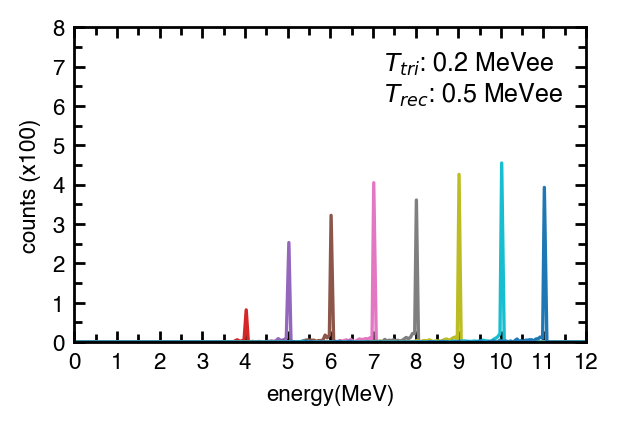

In [27]:
fig = fig_pre_def(6.5,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
eff = []
max_eff =[]
divider=100
for i in np.arange(10,120,10):
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Rec_nE"]+globals()["pro_"+str(int(i))+"MeV"]["Recoil_p_E"] ,240,0,12)
    #print(globals()["y_"+str(i)+"MeV"])
    eff = np.append(eff, sum(globals()["y_"+str(i)+"MeV"]))
    max_eff = np.append(max_eff, np.max(globals()["y_"+str(i)+"MeV"]))
print(i," .  ",eff)
print(i," . max eff  ",max_eff)
print(np.average(eff[4:]))
for i in np.arange(10,120,10):
    plt.plot(axis,globals()["y_"+str(i)+"MeV"]/divider,linewidth =1.2)#,label=str(i/10)+"MeV")

fig_post_def(xlim=(0,12),ylim=(0,800/divider)
             ,xlabel="energy(MeV)",ylabel="counts (x100)"
             ,xticks = (1,0.5),yticks = (100/divider,50/divider)
             ,lg_fs=9,n_col =2
             ,title = r'$T_{tri}$: '+ str(tri_LO_threshold)+ ' MeVee\n$T_{rec}$: '+ str(rec_LO_threshold)+' MeVee') 
#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/NSTOF_simulation_threshold_4.svg', format="svg")

In [ ]:
print(sum(y_60MeV))

694


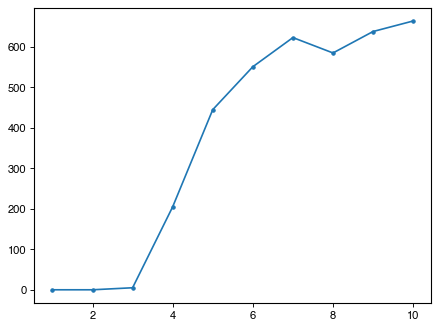

In [ ]:
E_x = np.arange(1,11,1)
plt.plot(E_x,eff,'.-')

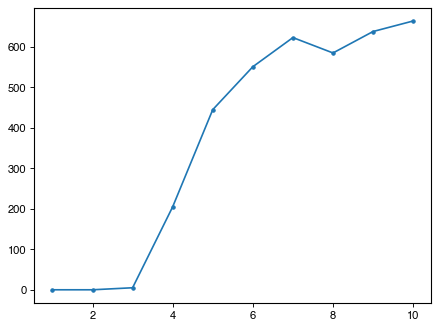

In [20]:
output_effeciency = np.arange(1,11,1)[:,np.newaxis]
output_effeciency = np.column_stack((output_effeciency,eff[:,np.newaxis]))
plt.plot(output_effeciency[:,0],output_effeciency[:,1],'.-')

In [21]:
np.savetxt('Deg60_TOF_effciency_threshold.txt',output_effeciency)

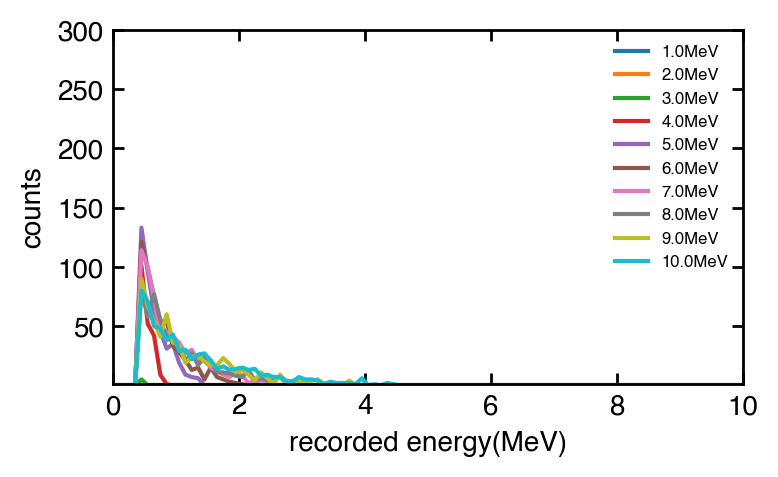

In [33]:
eff=[]
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
for i in np.arange(10,110,10):
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Rec_LO"] ,100,0,10)
    eff = np.append(eff, sum(globals()["y_"+str(i)+"MeV"]))
for i in np.arange(10,110,10):
    plt.plot(axis,globals()["y_"+str(i)+"MeV"],label=str(i/10)+"MeV")
fig_post_def(xlim=(0,10),ylim=(1,300),xlabel="recorded energy(MeV)",ylabel="counts")  

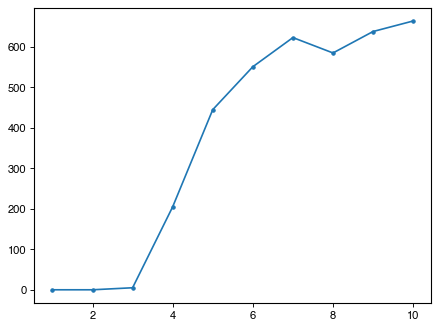

In [34]:
output_effeciency = np.arange(1,11,1)[:,np.newaxis]
output_effeciency = np.column_stack((output_effeciency,eff[:,np.newaxis]))
plt.plot(output_effeciency[:,0],output_effeciency[:,1],'.-')

InvalidIndexError: (slice(None, None, None), 2)

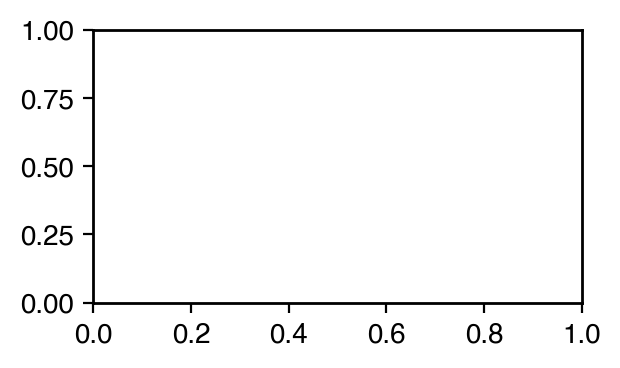

In [35]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
axis,y_10MeV=sorting(data_10MeV[:,2],100,0,10)
axis,y_20MeV=sorting(data_20MeV[:,2],100,0,10)
axis,y_30MeV=sorting(data_30MeV[:,2],100,0,10)
axis,y_40MeV=sorting(data_40MeV[:,2],100,0,10)
axis,y_50MeV=sorting(data_50MeV[:,2],100,0,10)
axis,y_60MeV=sorting(data_60MeV[:,2],100,0,10)
axis,y_70MeV=sorting(data_70MeV[:,2],100,0,10)
axis,y_80MeV=sorting(data_80MeV[:,2],100,0,10)
axis,y_90MeV=sorting(data_90MeV[:,2],100,0,10)
axis,y_100MeV=sorting(data_100MeV[:,2],100,0,10)

plt.plot(axis,y_10MeV,label="1MeV")
plt.plot(axis,y_20MeV,label="2MeV")
plt.plot(axis,y_30MeV,label="3MeV")
plt.plot(axis,y_40MeV,label="4MeV")
plt.plot(axis,y_50MeV,label="5MeV")
plt.plot(axis,y_60MeV,label="6MeV")
plt.plot(axis,y_70MeV,label="7MeV")
plt.plot(axis,y_80MeV,label="8MeV")
plt.plot(axis,y_90MeV,label="9MeV")
plt.plot(axis,y_100MeV,label="10MeV")
fig_post_def(xlim=(0,5),ylim=(1,4500),xlabel="light output(MeVee)",ylabel="counts")
plt.yscale("log")


In [ ]:
print("Core||","counts||", "Lightoutput in trigger||","proton_energy intrigger||" ,"neutron_energy on surface||" ,"LO_in_n_detector||")

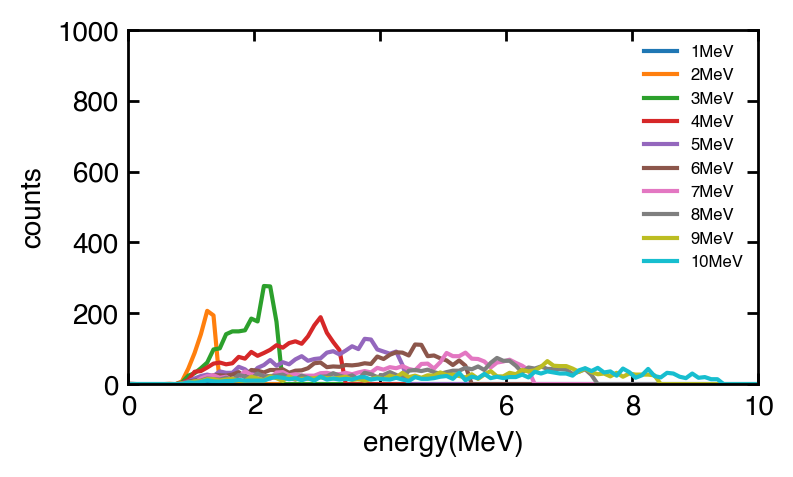

In [ ]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
tri_LO_threshold =0.1
rec_LO_threshold =0.1
data_10MeV_f = data_10MeV [data_10MeV [:,2]>tri_LO_threshold]
data_20MeV_f = data_20MeV [data_20MeV [:,2]>tri_LO_threshold]
data_30MeV_f = data_30MeV [data_30MeV [:,2]>tri_LO_threshold]
data_40MeV_f = data_40MeV [data_40MeV [:,2]>tri_LO_threshold]
data_50MeV_f = data_50MeV [data_50MeV [:,2]>tri_LO_threshold]
data_60MeV_f = data_60MeV [data_60MeV [:,2]>tri_LO_threshold]
data_70MeV_f = data_70MeV [data_70MeV [:,2]>tri_LO_threshold]
data_80MeV_f = data_80MeV [data_80MeV [:,2]>tri_LO_threshold]
data_90MeV_f = data_90MeV [data_90MeV [:,2]>tri_LO_threshold]
data_100MeV_f =data_100MeV[data_100MeV[:,2]>tri_LO_threshold]

data_10MeV_f2 = data_10MeV_f [data_10MeV_f [:,5]>rec_LO_threshold]
data_20MeV_f2 = data_20MeV_f [data_20MeV_f [:,5]>rec_LO_threshold]
data_30MeV_f2 = data_30MeV_f [data_30MeV_f [:,5]>rec_LO_threshold]
data_40MeV_f2 = data_40MeV_f [data_40MeV_f [:,5]>rec_LO_threshold]
data_50MeV_f2 = data_50MeV_f [data_50MeV_f [:,5]>rec_LO_threshold]
data_60MeV_f2 = data_60MeV_f [data_60MeV_f [:,5]>rec_LO_threshold]
data_70MeV_f2 = data_70MeV_f [data_70MeV_f [:,5]>rec_LO_threshold]
data_80MeV_f2 = data_80MeV_f [data_80MeV_f [:,5]>rec_LO_threshold]
data_90MeV_f2 = data_90MeV_f [data_90MeV_f [:,5]>rec_LO_threshold]
data_100MeV_f2 =data_100MeV_f[data_100MeV_f[:,5]>rec_LO_threshold]

axis,y_10MeV =sorting(data_10MeV_f2[:,4],120,0,12)
axis,y_20MeV =sorting(data_20MeV_f2[:,4],120,0,12)
axis,y_30MeV =sorting(data_30MeV_f2[:,4],120,0,12)
axis,y_40MeV =sorting(data_40MeV_f2[:,4],120,0,12)
axis,y_50MeV =sorting(data_50MeV_f2[:,4],120,0,12)
axis,y_60MeV =sorting(data_60MeV_f2[:,4],120,0,12)
axis,y_70MeV =sorting(data_70MeV_f2[:,4],120,0,12)
axis,y_80MeV =sorting(data_80MeV_f2[:,4],120,0,12)
axis,y_90MeV =sorting(data_90MeV_f2[:,4],120,0,12)
axis,y_100MeV=sorting(data_100MeV_f2[:,4],120,0,12)

plt.plot(axis,y_10MeV,label="1MeV")
plt.plot(axis,y_20MeV,label="2MeV")
plt.plot(axis,y_30MeV,label="3MeV")
plt.plot(axis,y_40MeV,label="4MeV")
plt.plot(axis,y_50MeV,label="5MeV")
plt.plot(axis,y_60MeV,label="6MeV")
plt.plot(axis,y_70MeV,label="7MeV")
plt.plot(axis,y_80MeV,label="8MeV")
plt.plot(axis,y_90MeV,label="9MeV")
plt.plot(axis,y_100MeV,label="10MeV")
fig_post_def(xlim=(0,10),ylim=(0,1000),xlabel="energy(MeV)",ylabel="counts")

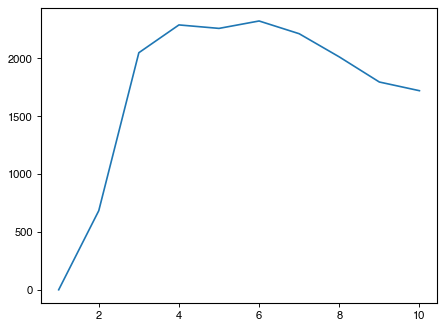

In [ ]:
effeciency=[]
for i in np.arange(10,110,10):
    #data = vars("data_"+i+"MeV")
    data = eval("y_"+str(i)+"MeV")
    effeciency = np.append(effeciency,data.sum())
plt.plot(np.arange(1,11,1),effeciency)


In [42]:
output_effeciency = np.arange(1,11,1)[:,np.newaxis]
output_effeciency = np.column_stack((output_effeciency,effeciency[:,np.newaxis]))
plt.plot(output_effeciency[:,0],output_effeciency[:,1])

NameError: name 'effeciency' is not defined

In [43]:
np.savetxt('TOF_effciency_threshold.txt',output_effeciency)

In [34]:

data_1MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_1MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_30deg_2E9_All_in_one_1.0MeV_"+str(int(i))+".txt")
    else:
        data_1MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_30deg_2E9_All_in_one_1.0MeV_"+str(int(i))+".txt")
        data_1MeV = np.vstack((data_1MeV,data_1MeV_temp))
        #print(data_6MeV.shape)

In [35]:
data_2MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_2MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_2.0MeV_"+str(int(i))+".txt")
    else:
        data_2MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_2.0MeV_"+str(int(i))+".txt")
        data_2MeV = np.vstack((data_2MeV,data_2MeV_temp))
        #print(data_6MeV.shape)

In [19]:
print("Core||","counts||", "Lightoutput in trigger||","proton_energy intrigger||" ,"neutron_energy on surface||" ,"LO_in_n_detector||")
print(data_2MeV)
print(data_2MeV.shape)


Core|| counts|| Lightoutput in trigger|| proton_energy intrigger|| neutron_energy on surface|| LO_in_n_detector||
[[0.00000e+00 1.00000e+00 5.32399e-01 2.00094e+00 1.11745e-04 3.01132e-06]
 [0.00000e+00 2.00000e+00 8.09681e-02 5.26814e-01 1.37009e+00 2.21919e-02]
 [0.00000e+00 3.00000e+00 8.33446e-02 6.11899e-01 1.38843e+00 1.65221e-01]
 ...
 [2.90000e+01 2.63000e+02 5.14415e-02 3.78852e-01 1.62135e+00 1.24825e-01]
 [2.90000e+01 2.64000e+02 3.60791e-01 1.77655e+00 2.24417e-01 1.69843e-03]
 [2.90000e+01 2.65000e+02 1.76316e-01 9.15149e-01 1.08535e+00 3.82926e-03]]
(8258, 6)


In [28]:
for i in np.arange(1,3):
    print(i)
    temp = globals()["data_"+str(i)+"MeV"]
    
    print(temp)

1
[[0.00000e+00 1.00000e+00 9.53814e-02 8.23465e-01 5.88574e-02 2.18979e-03]
 [0.00000e+00 2.00000e+00 1.97069e-02 1.85149e-01 8.14952e-01 6.28922e-02]
 [0.00000e+00 3.00000e+00 1.42242e-01 9.92680e-01 7.86035e-03 2.66725e-04]
 ...
 [2.90000e+01 3.23000e+02 1.43791e-01 1.00048e+00 2.00957e-05 7.25006e-07]
 [2.90000e+01 3.24000e+02 2.29178e-02 2.07528e-01 7.92585e-01 6.72140e-02]
 [2.90000e+01 3.25000e+02 1.14448e-02 1.22383e-01 8.77684e-01 1.07538e-01]]
2
[[0.00000e+00 1.00000e+00 5.32399e-01 2.00094e+00 1.11745e-04 3.01132e-06]
 [0.00000e+00 2.00000e+00 8.09681e-02 5.26814e-01 1.37009e+00 2.21919e-02]
 [0.00000e+00 3.00000e+00 8.33446e-02 6.11899e-01 1.38843e+00 1.65221e-01]
 ...
 [2.90000e+01 2.63000e+02 5.14415e-02 3.78852e-01 1.62135e+00 1.24825e-01]
 [2.90000e+01 2.64000e+02 3.60791e-01 1.77655e+00 2.24417e-01 1.69843e-03]
 [2.90000e+01 2.65000e+02 1.76316e-01 9.15149e-01 1.08535e+00 3.82926e-03]]


In [20]:
data = pd.read_csv('data/202210_EJ309_N_scatter_exp_All_in_one_2.0MeV_1.txt', sep="\s+", header=None)

data.columns=["Core", "counts", "Lightoutput in trigger", "proton_energy intrigger","neutron_energy on surface","LO_in_n_detector"]
#data.to_frame()
print(data['counts'])
dataT = data[data['counts']>200]
print(dataT)

0        1
1        2
2        3
3        4
4        5
      ... 
266    267
267    268
268    269
269    270
270    271
Name: counts, Length: 271, dtype: int64
     Core  counts  Lightoutput in trigger  proton_energy intrigger  \
200     1     201                0.161751                 0.955801   
201     1     202                0.383873                 1.941820   
202     1     203                0.003147                 0.045513   
203     1     204                0.158386                 0.848857   
204     1     205                0.263914                 1.292230   
..    ...     ...                     ...                      ...   
266     1     267                0.031354                 0.310616   
267     1     268                0.090080                 0.568780   
268     1     269                0.089698                 0.567047   
269     1     270                0.068679                 0.560006   
270     1     271                0.060506                 0.426579   

In [8]:
print(data.iloc[:,0])

0      1
1      1
2      1
3      1
4      1
      ..
266    1
267    1
268    1
269    1
270    1
Name: Core, Length: 271, dtype: int64


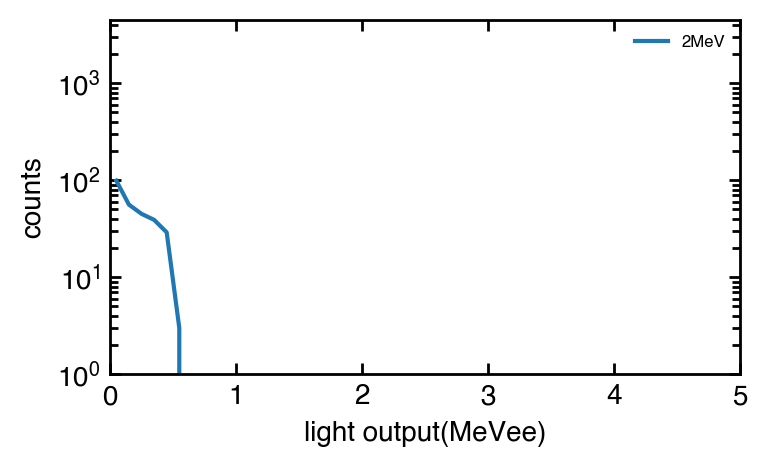

In [9]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

axis,y_2MeV=sorting(data['Lightoutput in trigger'],100,0,10)

plt.plot(axis,y_2MeV,label="2MeV")

fig_post_def(xlim=(0,5),ylim=(1,4500),xlabel="light output(MeVee)",ylabel="counts")
plt.yscale("log")



In [10]:
data_3MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_3MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_3.0MeV_"+str(int(i))+".txt")
    else:
        data_3MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_3.0MeV_"+str(int(i))+".txt")
        data_3MeV = np.vstack((data_3MeV,data_3MeV_temp))

In [11]:
data_4MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_4MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_4.0MeV_"+str(int(i))+".txt")
    else:
        data_4MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_4.0MeV_"+str(int(i))+".txt")
        data_4MeV = np.vstack((data_4MeV,data_4MeV_temp))

In [12]:
data_5MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_5MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_5.0MeV_"+str(int(i))+".txt")
    else:
        data_5MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_5.0MeV_"+str(int(i))+".txt")
        data_5MeV = np.vstack((data_5MeV,data_5MeV_temp))

In [13]:
data_6MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_6MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_6.0MeV_"+str(int(i))+".txt")
    else:
        data_6MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_6.0MeV_"+str(int(i))+".txt")
        data_6MeV = np.vstack((data_6MeV,data_6MeV_temp))

In [14]:
data_7MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_7MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_7.0MeV_"+str(int(i))+".txt")
    else:
        data_7MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_7.0MeV_"+str(int(i))+".txt")
        data_7MeV = np.vstack((data_7MeV,data_7MeV_temp))

In [15]:
data_8MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_8MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_8.0MeV_"+str(int(i))+".txt")
    else:
        data_8MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_8.0MeV_"+str(int(i))+".txt")
        data_8MeV = np.vstack((data_8MeV,data_8MeV_temp))

In [16]:
data_9MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_9MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_9.0MeV_"+str(int(i))+".txt")
    else:
        data_9MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_9.0MeV_"+str(int(i))+".txt")
        data_9MeV = np.vstack((data_9MeV,data_9MeV_temp))

In [17]:
data_10MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_10MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_10.0MeV_"+str(int(i))+".txt")
    else:
        data_10MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_10.0MeV_"+str(int(i))+".txt")
        data_10MeV = np.vstack((data_10MeV,data_10MeV_temp))

NameError: name 'data_2MeV' is not defined

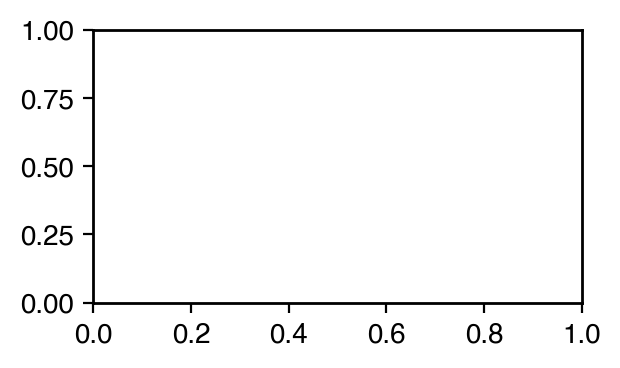

In [12]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
axis,y_1MeV=sorting(data_1MeV[:,2],100,0,10)
axis,y_2MeV=sorting(data_2MeV[:,2],100,0,10)
axis,y_3MeV=sorting(data_3MeV[:,2],100,0,10)
axis,y_4MeV=sorting(data_4MeV[:,2],100,0,10)
axis,y_5MeV=sorting(data_5MeV[:,2],100,0,10)
axis,y_6MeV=sorting(data_6MeV[:,2],100,0,10)
axis,y_7MeV=sorting(data_7MeV[:,2],100,0,10)
axis,y_8MeV=sorting(data_8MeV[:,2],100,0,10)
axis,y_9MeV=sorting(data_9MeV[:,2],100,0,10)
axis,y_10MeV=sorting(data_10MeV[:,2],100,0,10)

plt.plot(axis,y_1MeV,label="1MeV")
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
plt.plot(axis,y_10MeV,label="10MeV")
fig_post_def(xlim=(0,5),ylim=(1,4500),xlabel="light output(MeVee)",ylabel="counts")
plt.yscale("log")



In [19]:
print(axis)

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95 3.05 3.15 3.25 3.35 3.45 3.55 3.65 3.75 3.85 3.95 4.05 4.15
 4.25 4.35 4.45 4.55 4.65 4.75 4.85 4.95 5.05 5.15 5.25 5.35 5.45 5.55
 5.65 5.75 5.85 5.95 6.05 6.15 6.25 6.35 6.45 6.55 6.65 6.75 6.85 6.95
 7.05 7.15 7.25 7.35 7.45 7.55 7.65 7.75 7.85 7.95 8.05 8.15 8.25 8.35
 8.45 8.55 8.65 8.75 8.85 8.95 9.05 9.15 9.25 9.35 9.45 9.55 9.65 9.75
 9.85 9.95]


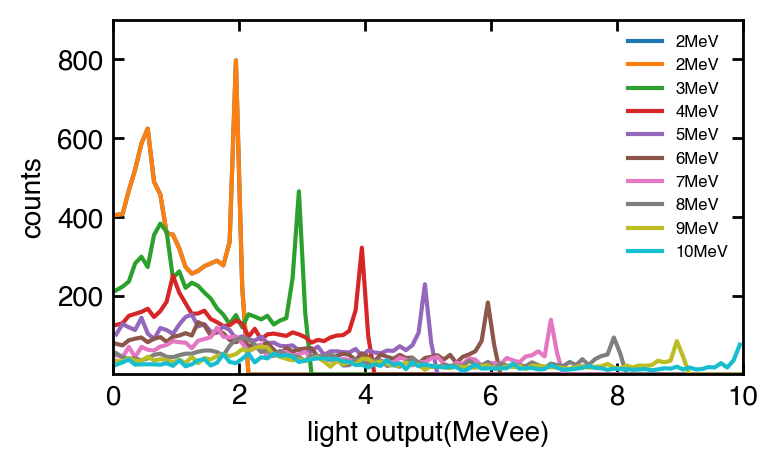

In [20]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
axis,y_1MeV=sorting(data_1MeV[:,3],100,0,10)
axis,y_2MeV=sorting(data_2MeV[:,3],100,0,10)
axis,y_3MeV=sorting(data_3MeV[:,3],100,0,10)
axis,y_4MeV=sorting(data_4MeV[:,3],100,0,10)
axis,y_5MeV=sorting(data_5MeV[:,3],100,0,10)
axis,y_6MeV=sorting(data_6MeV[:,3],100,0,10)
axis,y_7MeV=sorting(data_7MeV[:,3],100,0,10)
axis,y_8MeV=sorting(data_8MeV[:,3],100,0,10)
axis,y_9MeV=sorting(data_9MeV[:,3],100,0,10)
axis,y_10MeV=sorting(data_10MeV[:,3],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
plt.plot(axis,y_10MeV,label="10MeV")
fig_post_def(xlim=(0,10),ylim=(1,900),xlabel="light output(MeVee)",ylabel="counts")
#plt.yscale("log")



In [21]:
print(data_2MeV[:,3].max())

2.00109


# neutron energy on recording detector surface

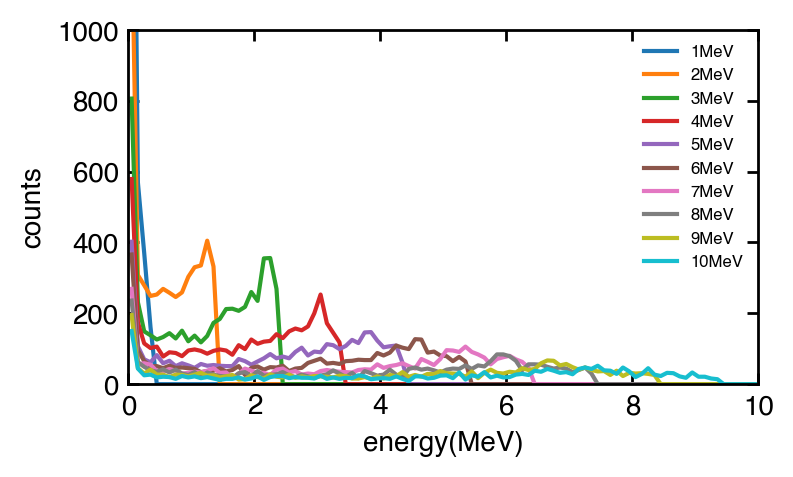

In [22]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
LO_threshold =0.1
data_1MeV_f = data_1MeV [data_1MeV [:,2]>LO_threshold]
data_2MeV_f = data_2MeV [data_2MeV [:,2]>LO_threshold]
data_3MeV_f = data_3MeV [data_3MeV [:,2]>LO_threshold]
data_4MeV_f = data_4MeV [data_4MeV [:,2]>LO_threshold]
data_5MeV_f = data_5MeV [data_5MeV [:,2]>LO_threshold]
data_6MeV_f = data_6MeV [data_6MeV [:,2]>LO_threshold]
data_7MeV_f = data_7MeV [data_7MeV [:,2]>LO_threshold]
data_8MeV_f = data_8MeV [data_8MeV [:,2]>LO_threshold]
data_9MeV_f = data_9MeV [data_9MeV [:,2]>LO_threshold]
data_10MeV_f =data_10MeV[data_10MeV[:,2]>LO_threshold]


axis,y_1MeV =sorting(data_1MeV_f[:,4],120,0,12)
axis,y_2MeV =sorting(data_2MeV_f[:,4],120,0,12)
axis,y_3MeV =sorting(data_3MeV_f[:,4],120,0,12)
axis,y_4MeV =sorting(data_4MeV_f[:,4],120,0,12)
axis,y_5MeV =sorting(data_5MeV_f[:,4],120,0,12)
axis,y_6MeV =sorting(data_6MeV_f[:,4],120,0,12)
axis,y_7MeV =sorting(data_7MeV_f[:,4],120,0,12)
axis,y_8MeV =sorting(data_8MeV_f[:,4],120,0,12)
axis,y_9MeV =sorting(data_9MeV_f[:,4],120,0,12)
axis,y_10MeV=sorting(data_10MeV_f[:,4],120,0,12)

plt.plot(axis,y_1MeV,label="1MeV")
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
plt.plot(axis,y_10MeV,label="10MeV")
fig_post_def(xlim=(0,10),ylim=(0,1000),xlabel="energy(MeV)",ylabel="counts")

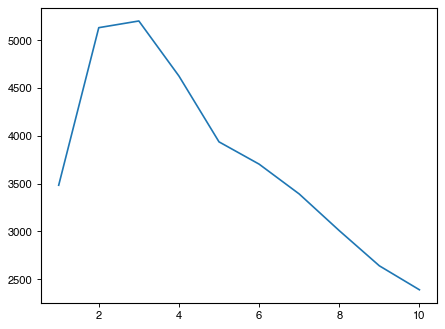

In [23]:
effeciency=[]
for i in np.arange(1,11,1):
    #data = vars("data_"+i+"MeV")
    data = eval("y_"+str(i)+"MeV")
    effeciency = np.append(effeciency,data.sum())
plt.plot(np.arange(1,11,1),effeciency)


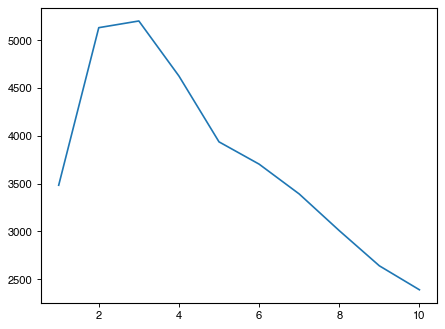

In [312]:
output_effeciency = np.arange(1,11,1)[:,np.newaxis]
output_effeciency = np.column_stack((output_effeciency,effeciency[:,np.newaxis]))
plt.plot(output_effeciency[:,0],output_effeciency[:,1])

In [314]:
np.savetxt('TOF_effciency.txt',output_effeciency)

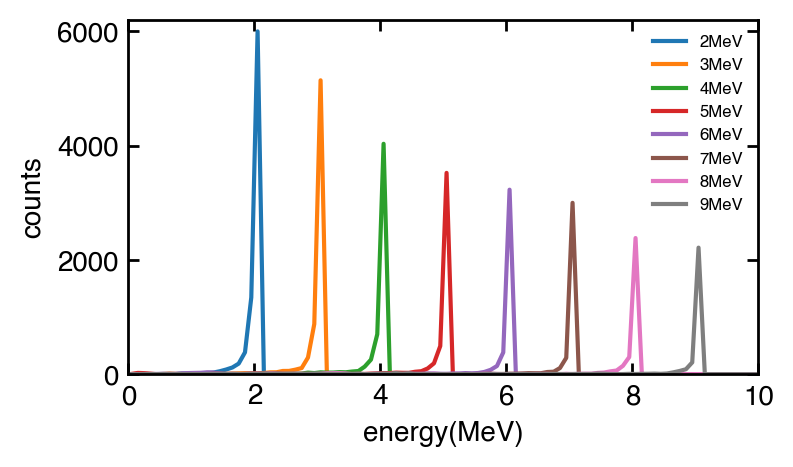

In [16]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

axis,y_2MeV=sorting(data_2MeV[:,3]+data_2MeV[:,4],100,0,10)
axis,y_3MeV=sorting(data_3MeV[:,3]+data_3MeV[:,4],100,0,10)
axis,y_4MeV=sorting(data_4MeV[:,3]+data_4MeV[:,4],100,0,10)
axis,y_5MeV=sorting(data_5MeV[:,3]+data_5MeV[:,4],100,0,10)
axis,y_6MeV=sorting(data_6MeV[:,3]+data_6MeV[:,4],100,0,10)
axis,y_7MeV=sorting(data_7MeV[:,3]+data_7MeV[:,4],100,0,10)
axis,y_8MeV=sorting(data_8MeV[:,3]+data_8MeV[:,4],100,0,10)
axis,y_9MeV=sorting(data_9MeV[:,3]+data_9MeV[:,4],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
fig_post_def(xlim=(0,10),ylim=(0,6200),xlabel="energy(MeV)",ylabel="counts")

In [17]:
def Light_output_exponential_method(E):
    A=0.62  #0.817
    B=1.3   #2.63
    C=0.39  #0.297
    D=0.97  #1
    LO =A*E-B*(1-np.exp(-1*C*E**D))
    return LO

In [18]:
enegy_range= np.arange(0,10,0.0001)
lightoutput_2inches= Light_output_exponential_method(enegy_range)
print(lightoutput_2inches)

[ 0.00000000e+00 -4.83389860e-06 -6.91372695e-06 ...  4.93395618e+00
  4.93401698e+00  4.93407777e+00]


In [19]:
def interpolation_function(data_x,data_y,new_x):
    new_y = interp1d(data_x, data_y,fill_value="extrapolate")(new_x)
    return new_y

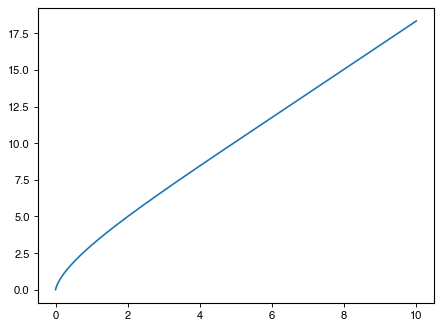

In [20]:
LO_range= np.arange(0,10,0.00001)
P_Energy_inter = interpolation_function(lightoutput_2inches,enegy_range,LO_range)
plt.plot(LO_range,P_Energy_inter)

In [21]:
P_Energy_inter[9041]

0.5702714291205089

In [92]:
data_2MeV_LO=[]
for i in np.arange(0,len(data_2MeV[:,2]),1):
    index = int(data_2MeV[i,2]*100000)
    data_LO_temp = np.append(data_2MeV[i,:],P_Energy_inter[index])
    if i ==0: data_2MeV_LO = data_LO_temp.copy()
    else:     data_2MeV_LO = np.vstack((data_2MeV_LO,data_LO_temp))

In [93]:
data_3MeV_LO=[]
for i in np.arange(0,len(data_3MeV[:,2]),1):
    index = int(data_3MeV[i,2]*100000)
    data_LO_temp = np.append(data_3MeV[i,:],P_Energy_inter[index])
    if i ==0: data_3MeV_LO = data_LO_temp.copy()
    else:     data_3MeV_LO = np.vstack((data_3MeV_LO,data_LO_temp))

In [94]:
data_4MeV_LO=[]
for i in np.arange(0,len(data_4MeV[:,2]),1):
    index = int(data_4MeV[i,2]*100000)
    data_LO_temp = np.append(data_4MeV[i,:],P_Energy_inter[index])
    if i ==0: data_4MeV_LO = data_LO_temp.copy()
    else:     data_4MeV_LO = np.vstack((data_4MeV_LO,data_LO_temp))

In [95]:
data_5MeV_LO=[]
for i in np.arange(0,len(data_5MeV[:,2]),1):
    index = int(data_5MeV[i,2]*100000)
    data_LO_temp = np.append(data_5MeV[i,:],P_Energy_inter[index])
    if i ==0: data_5MeV_LO = data_LO_temp.copy()
    else:     data_5MeV_LO = np.vstack((data_5MeV_LO,data_LO_temp))

In [96]:
data_6MeV_LO=[]
for i in np.arange(0,len(data_6MeV[:,2]),1):
    index = int(data_6MeV[i,2]*100000)
    data_LO_temp = np.append(data_6MeV[i,:],P_Energy_inter[index])
    if i ==0: data_6MeV_LO = data_LO_temp.copy()
    else:     data_6MeV_LO = np.vstack((data_6MeV_LO,data_LO_temp))

In [97]:
data_7MeV_LO=[]
for i in np.arange(0,len(data_7MeV[:,2]),1):
    index = int(data_7MeV[i,2]*100000)
    data_LO_temp = np.append(data_7MeV[i,:],P_Energy_inter[index])
    if i ==0: data_7MeV_LO = data_LO_temp.copy()
    else:     data_7MeV_LO = np.vstack((data_7MeV_LO,data_LO_temp))

In [98]:
data_8MeV_LO=[]
for i in np.arange(0,len(data_8MeV[:,2]),1):
    index = int(data_8MeV[i,2]*100000)
    data_LO_temp = np.append(data_8MeV[i,:],P_Energy_inter[index])
    if i ==0: data_8MeV_LO = data_LO_temp.copy()
    else:     data_8MeV_LO = np.vstack((data_8MeV_LO,data_LO_temp))

In [99]:
data_9MeV_LO=[]
for i in np.arange(0,len(data_9MeV[:,2]),1):
    index = int(data_9MeV[i,2]*100000)
    data_LO_temp = np.append(data_9MeV[i,:],P_Energy_inter[index])
    if i ==0: data_9MeV_LO = data_LO_temp.copy()
    else:     data_9MeV_LO = np.vstack((data_9MeV_LO,data_LO_temp))

In [103]:
threshold =0.2
data_2MeV_LO_threshold=data_2MeV_LO[data_2MeV_LO[:,5]>threshold]
data_3MeV_LO_threshold=data_3MeV_LO[data_3MeV_LO[:,5]>threshold]
data_4MeV_LO_threshold=data_4MeV_LO[data_4MeV_LO[:,5]>threshold]
data_5MeV_LO_threshold=data_5MeV_LO[data_5MeV_LO[:,5]>threshold]
data_6MeV_LO_threshold=data_6MeV_LO[data_6MeV_LO[:,5]>threshold]
data_7MeV_LO_threshold=data_7MeV_LO[data_7MeV_LO[:,5]>threshold]
data_8MeV_LO_threshold=data_8MeV_LO[data_8MeV_LO[:,5]>threshold]
data_9MeV_LO_threshold=data_9MeV_LO[data_9MeV_LO[:,5]>threshold]

#data_2MeV_LO_threshold=data_2MeV_LO_threshold[data_2MeV_LO_threshold[:,5]>threshold]
#data_3MeV_LO_threshold=data_3MeV_LO_threshold[data_3MeV_LO_threshold[:,5]>threshold]
#data_4MeV_LO_threshold=data_4MeV_LO_threshold[data_4MeV_LO_threshold[:,5]>threshold]
#data_5MeV_LO_threshold=data_5MeV_LO_threshold[data_5MeV_LO_threshold[:,5]>threshold]
#data_6MeV_LO_threshold=data_6MeV_LO_threshold[data_6MeV_LO_threshold[:,5]>threshold]
#data_7MeV_LO_threshold=data_7MeV_LO_threshold[data_7MeV_LO_threshold[:,5]>threshold]
#data_8MeV_LO_threshold=data_8MeV_LO_threshold[data_8MeV_LO_threshold[:,5]>threshold]
#data_9MeV_LO_threshold=data_9MeV_LO_threshold[data_9MeV_LO_threshold[:,5]>threshold]

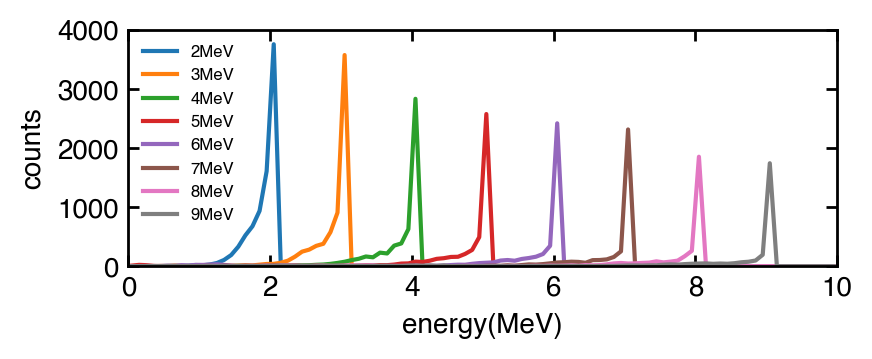

In [104]:
fig = fig_pre_def(9,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


axis,y_2MeV=sorting(data_2MeV_LO[:,6]+data_2MeV_LO[:,4],100,0,10)
axis,y_3MeV=sorting(data_3MeV_LO[:,6]+data_3MeV_LO[:,4],100,0,10)
axis,y_4MeV=sorting(data_4MeV_LO[:,6]+data_4MeV_LO[:,4],100,0,10)
axis,y_5MeV=sorting(data_5MeV_LO[:,6]+data_5MeV_LO[:,4],100,0,10)
axis,y_6MeV=sorting(data_6MeV_LO[:,6]+data_6MeV_LO[:,4],100,0,10)
axis,y_7MeV=sorting(data_7MeV_LO[:,6]+data_7MeV_LO[:,4],100,0,10)
axis,y_8MeV=sorting(data_8MeV_LO[:,6]+data_8MeV_LO[:,4],100,0,10)
axis,y_9MeV=sorting(data_9MeV_LO[:,6]+data_9MeV_LO[:,4],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
plt.legend(loc='upper left')
fig_post_def(xlim=(0,10),ylim=(0,4000),xlabel="energy(MeV)",ylabel="counts")



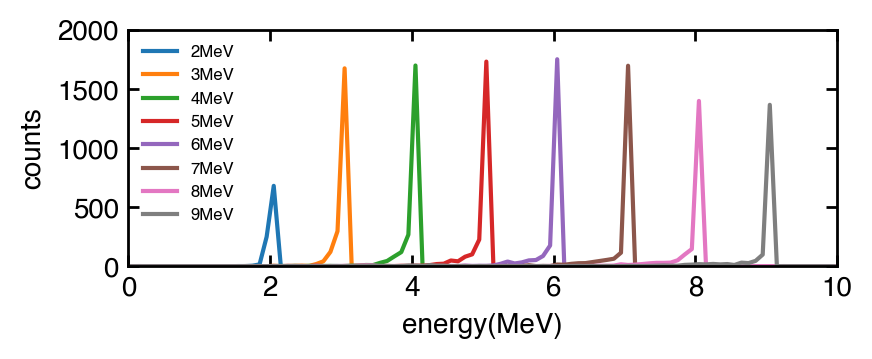

In [105]:
fig = fig_pre_def(9,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


axis,y_2MeV=sorting(data_2MeV_LO_threshold[:,6]+data_2MeV_LO_threshold[:,4],100,0,10)
axis,y_3MeV=sorting(data_3MeV_LO_threshold[:,6]+data_3MeV_LO_threshold[:,4],100,0,10)
axis,y_4MeV=sorting(data_4MeV_LO_threshold[:,6]+data_4MeV_LO_threshold[:,4],100,0,10)
axis,y_5MeV=sorting(data_5MeV_LO_threshold[:,6]+data_5MeV_LO_threshold[:,4],100,0,10)
axis,y_6MeV=sorting(data_6MeV_LO_threshold[:,6]+data_6MeV_LO_threshold[:,4],100,0,10)
axis,y_7MeV=sorting(data_7MeV_LO_threshold[:,6]+data_7MeV_LO_threshold[:,4],100,0,10)
axis,y_8MeV=sorting(data_8MeV_LO_threshold[:,6]+data_8MeV_LO_threshold[:,4],100,0,10)
axis,y_9MeV=sorting(data_9MeV_LO_threshold[:,6]+data_9MeV_LO_threshold[:,4],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
fig_post_def(xlim=(0,10),ylim=(0,2000),xlabel="energy(MeV)",ylabel="counts")



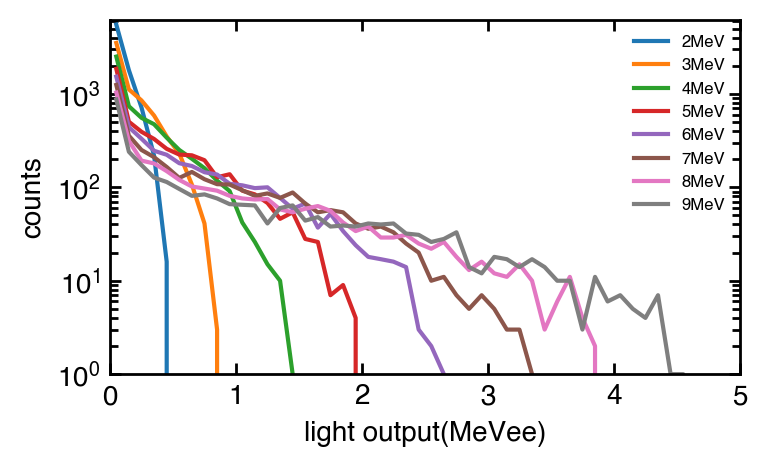

In [106]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

axis,y_2MeV=sorting(data_2MeV[:,5],100,0,10)
axis,y_3MeV=sorting(data_3MeV[:,5],100,0,10)
axis,y_4MeV=sorting(data_4MeV[:,5],100,0,10)
axis,y_5MeV=sorting(data_5MeV[:,5],100,0,10)
axis,y_6MeV=sorting(data_6MeV[:,5],100,0,10)
axis,y_7MeV=sorting(data_7MeV[:,5],100,0,10)
axis,y_8MeV=sorting(data_8MeV[:,5],100,0,10)
axis,y_9MeV=sorting(data_9MeV[:,5],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
fig_post_def(xlim=(0,5),ylim=(1,6200),xlabel="light output(MeVee)",ylabel="counts")
plt.yscale("log")

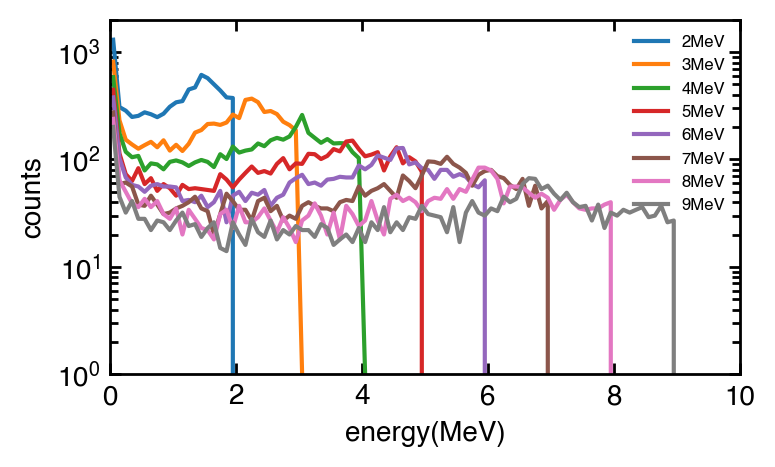

In [32]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

axis,y_2MeV=sorting(data_2MeV[:,4],100,0,10)
axis,y_3MeV=sorting(data_3MeV[:,4],100,0,10)
axis,y_4MeV=sorting(data_4MeV[:,4],100,0,10)
axis,y_5MeV=sorting(data_5MeV[:,4],100,0,10)
axis,y_6MeV=sorting(data_6MeV[:,4],100,0,10)
axis,y_7MeV=sorting(data_7MeV[:,4],100,0,10)
axis,y_8MeV=sorting(data_8MeV[:,4],100,0,10)
axis,y_9MeV=sorting(data_9MeV[:,4],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
fig_post_def(xlim=(0,10),ylim=(1,2000),xlabel="energy(MeV)",ylabel="counts")
plt.yscale("log")

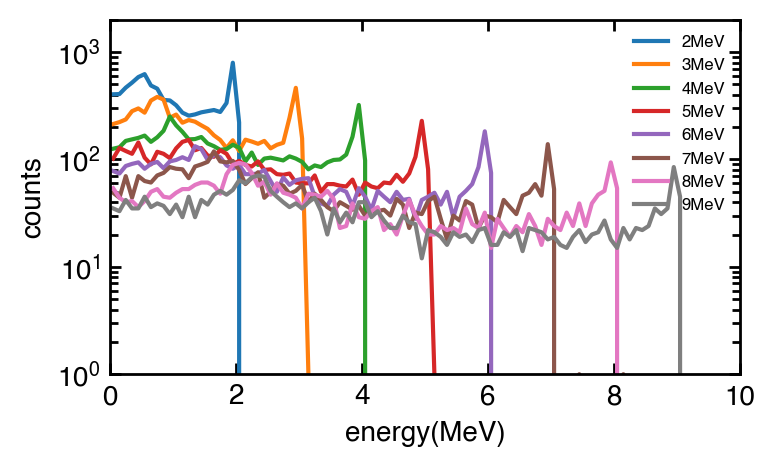

In [33]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

axis,y_2MeV=sorting(data_2MeV[:,3],100,0,10)
axis,y_3MeV=sorting(data_3MeV[:,3],100,0,10)
axis,y_4MeV=sorting(data_4MeV[:,3],100,0,10)
axis,y_5MeV=sorting(data_5MeV[:,3],100,0,10)
axis,y_6MeV=sorting(data_6MeV[:,3],100,0,10)
axis,y_7MeV=sorting(data_7MeV[:,3],100,0,10)
axis,y_8MeV=sorting(data_8MeV[:,3],100,0,10)
axis,y_9MeV=sorting(data_9MeV[:,3],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
fig_post_def(xlim=(0,10),ylim=(1,2000),xlabel="energy(MeV)",ylabel="counts")
plt.yscale("log")

In [ ]:
print("Core||","counts||", "Lightoutput in trigger||","proton_energy intrigger||" ,"neutron_energy on surface||" ,"LO_in_n_detector||")

In [183]:
data_2MeV_LO_02low = data_2MeV_LO[data_2MeV_LO[:,5]<0.2]
data_2MeV_LO_02high = data_2MeV_LO[data_2MeV_LO[:,5]>0.2]

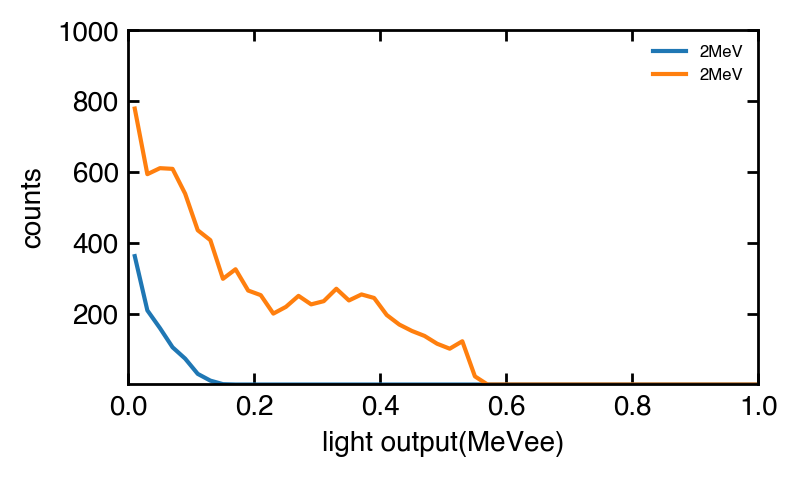

In [165]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


axis,y_2MeV=sorting(data_2MeV_LO_02high[:,2],500,0,10)
axis,y_2MeV_O=sorting(data_2MeV_LO[:,2],500,0,10)

plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_2MeV_O,label="2MeV")
fig_post_def(xlim=(0,1),ylim=(1,1000),xlabel="light output(MeVee)",ylabel="counts")

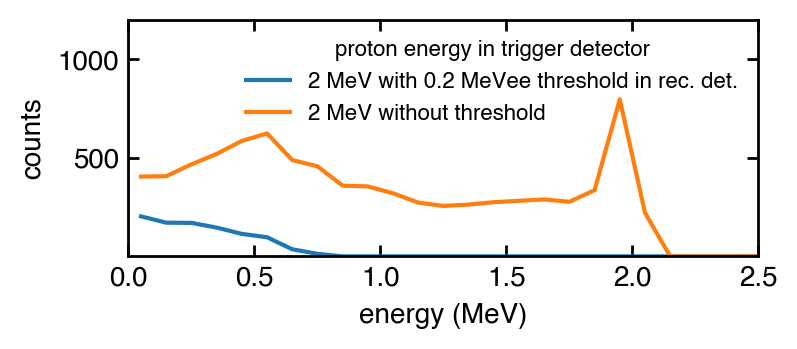

In [166]:
# proton energy in trigger detector
fig = fig_pre_def(8,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

axis,y_2MeV=sorting(data_2MeV_LO_02high[:,3],100,0,10)
axis,y_2MeV_O=sorting(data_2MeV_LO[:,3],100,0,10)

plt.plot(axis,y_2MeV,label="2 MeV with 0.2 MeVee threshold in rec. det.")
plt.plot(axis,y_2MeV_O,label="2 MeV without threshold")

fig_post_def(xlim=(0,2.5),ylim=(1,1200),lg_fs=8,title ='proton energy in trigger detector',xlabel="energy (MeV)",ylabel="counts")

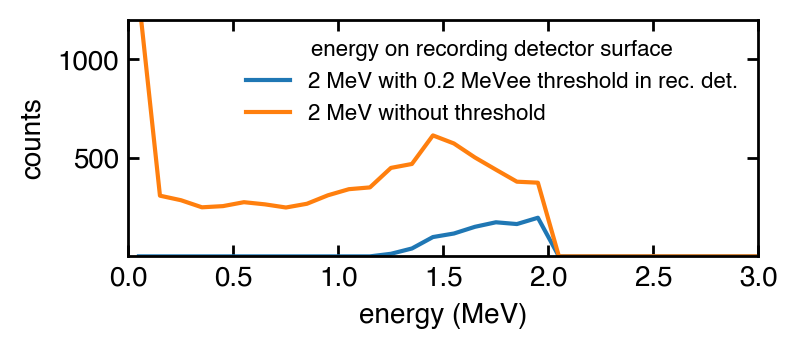

In [167]:
fig = fig_pre_def(8,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


axis,y_2MeV=sorting(data_2MeV_LO_02high[:,4],100,0,10)
axis,y_2MeV_O=sorting(data_2MeV_LO[:,4],100,0,10)

plt.plot(axis,y_2MeV,label="2 MeV with 0.2 MeVee threshold in rec. det.")
plt.plot(axis,y_2MeV_O,label="2 MeV without threshold")
fig_post_def(xlim=(0,3),ylim=(1,1200),lg_fs=8,title ='energy on recording detector surface',xlabel="energy (MeV)",ylabel="counts")

In [168]:
print("Core||","counts||", "Lightoutput in trigger||","proton_energy in trigger||" ,"neutron_energy on surface||" ,"LO_in_n_detector||")
print(data_2MeV_LO_02low[2,2:4])
lightoutput_2inches[448]


Core|| counts|| Lightoutput in trigger|| proton_energy in trigger|| neutron_energy on surface|| LO_in_n_detector||
[0.0833446 0.611899 ]


0.003082091797874338

In [169]:
data_2MeV_LO_02low_P_E   = data_2MeV_LO_02low[:,3]
data_2MeV_LO_02low_L_tri = data_2MeV_LO_02low[:,2]

In [179]:
LO_from_proton_E = []
for i in np.arange(0,len(data_2MeV_LO_02low_P_E),1):
    LO_temp = lightoutput_2inches[int(data_2MeV_LO_02low[i,3]*10000)]
    LO_from_proton_E = np.append(LO_from_proton_E,LO_temp)

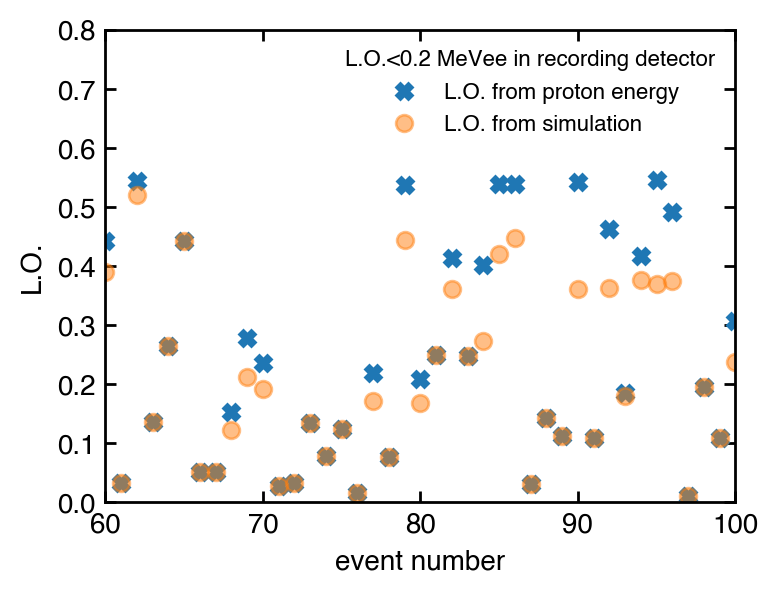

In [197]:
fig = fig_pre_def(8,6,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot(LO_from_proton_E,'X', label="L.O. from proton energy")
plt.plot(data_2MeV_LO_02low_L_tri,'o',alpha=0.5,label = "L.O. from simulation")

plt.xlim(60,100)
plt.ylim(0,0.8)
fig_post_def(xlim=(60,100),ylim=(0,0.8),lg_fs=8,title ='L.O.<0.2 MeVee in recording detector',xlabel="event number",ylabel="L.O.")

In [184]:
data_2MeV_LO_02high_P_E   = data_2MeV_LO_02high[:,3]
data_2MeV_LO_02high_L_tri = data_2MeV_LO_02high[:,2]

In [186]:
LO_from_proton_E_high = []
for i in np.arange(0,len(data_2MeV_LO_02high_P_E),1):
    LO_temp = lightoutput_2inches[int(data_2MeV_LO_02high[i,3]*10000)]
    LO_from_proton_E_high = np.append(LO_from_proton_E_high,LO_temp)

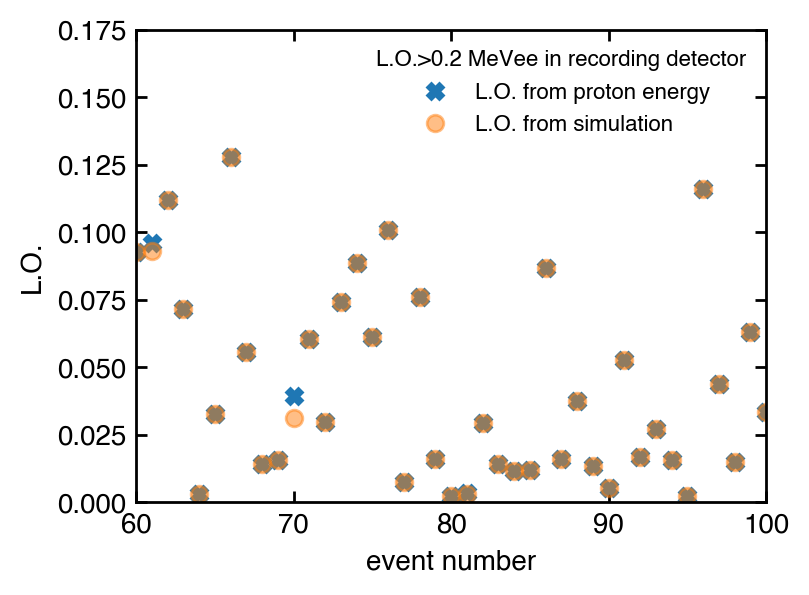

In [204]:
fig = fig_pre_def(8,6,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot(LO_from_proton_E_high,'X', label="L.O. from proton energy")
plt.plot(data_2MeV_LO_02high_L_tri,'o',alpha=0.5,label = "L.O. from simulation")


fig_post_def(xlim=(60,100),ylim=(0,0.175),lg_fs=8,title ='L.O.>0.2 MeVee in recording detector',xlabel="event number",ylabel="L.O.")

In [34]:
data_AmBe=[]
for i in np.arange(1,30,1):
    if i ==1:
        data_AmBe = np.loadtxt("data_AmBe/202210_EJ309_N_scatter_exp_1E9_All_in_one_AmBe_"+str(int(i))+".txt")
    else:
        data_AmBe_temp = np.loadtxt("data_AmBe/202210_EJ309_N_scatter_exp_1E9_All_in_one_AmBe_"+str(int(i))+".txt")
        data_AmBe = np.vstack((data_AmBe,data_AmBe_temp))
        #print(data_6MeV.shape)

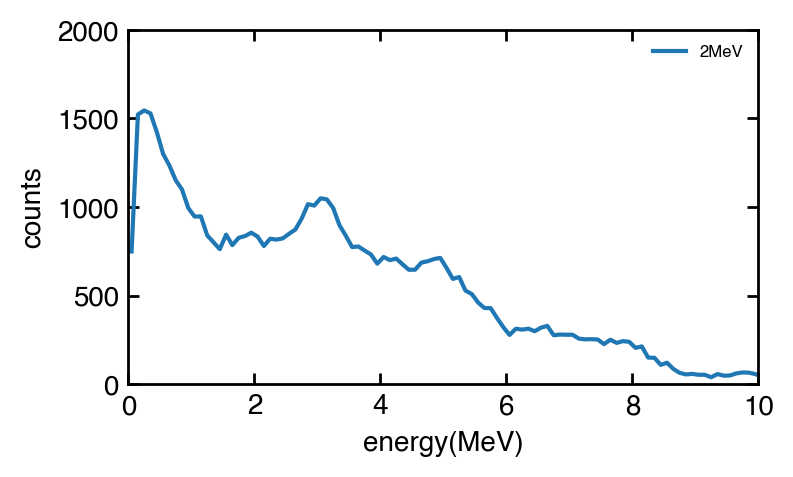

In [35]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


axis,y_AmBe=sorting(data_AmBe[:,3]+data_AmBe[:,4],120,0,12)
plt.plot(axis,y_AmBe,label="2MeV")

fig_post_def(xlim=(0,10),ylim=(0,2000),xlabel="energy(MeV)",ylabel="counts")





In [36]:
data_AmBe_LO=[]
for i in np.arange(0,len(data_AmBe[:,2]),1):
    index = int(data_AmBe[i,2]*100000)
    data_LO_temp = np.append(data_AmBe[i,:],P_Energy_inter[index])
    if i ==0: data_AmBe_LO = data_LO_temp.copy()
    else:     data_AmBe_LO = np.vstack((data_AmBe_LO,data_LO_temp))

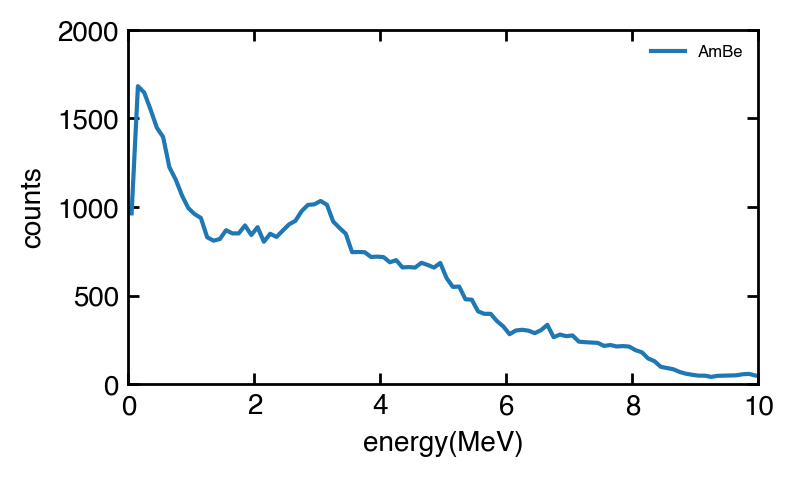

In [37]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


axis,y_AmBe=sorting(data_AmBe_LO[:,6]+data_AmBe_LO[:,4],100,0,10)

plt.plot(axis,y_AmBe,label="AmBe")

fig_post_def(xlim=(0,10),ylim=(0,2000),xlabel="energy(MeV)",ylabel="counts")

